<a href="https://colab.research.google.com/github/sreyaarc/Walmart-Sales-Analysis/blob/main/Walmart_Sales_Analysis_%26_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [192]:
%matplotlib inline

In [193]:
import warnings
warnings.filterwarnings("ignore")

In [194]:
df = pd.read_csv("Walmart (1).csv")
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [196]:
df.isna().sum()
# no null values present

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [197]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [198]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [199]:
df["Date"] = pd.to_datetime(df.Date)

In [200]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [201]:
df.info()
# the dtype of Date has changed from object to datetime64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [202]:
# checking outliers
col = []
for i in df.columns:
    if((df[i].dtype == "int64")|(df[i].dtype == "float64")):
        col.append(i)
col

['Store',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

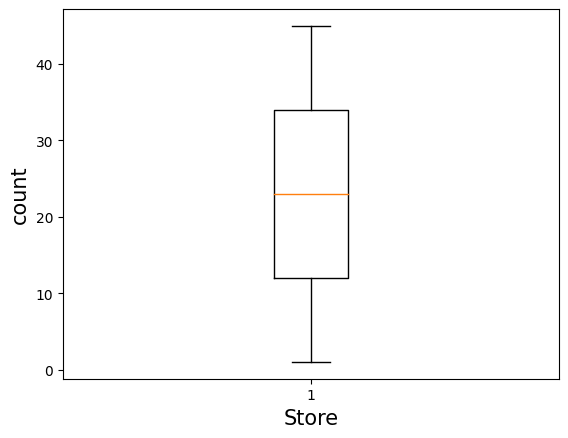

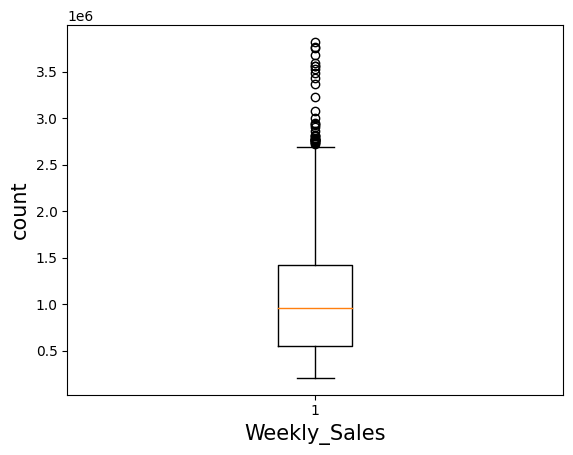

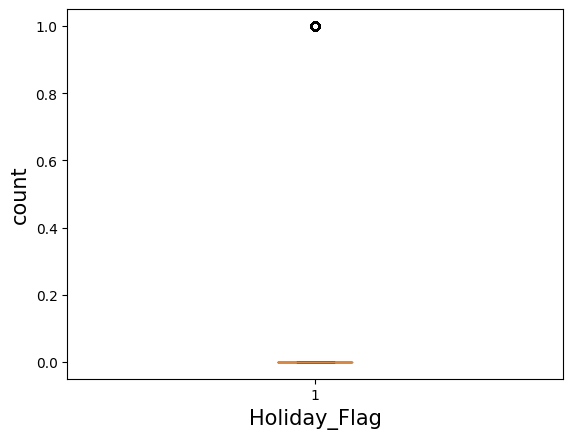

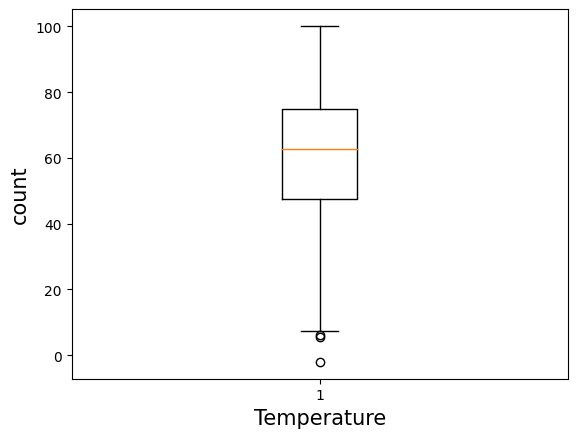

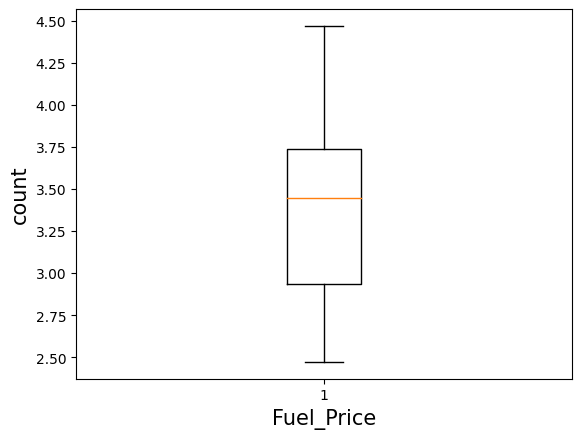

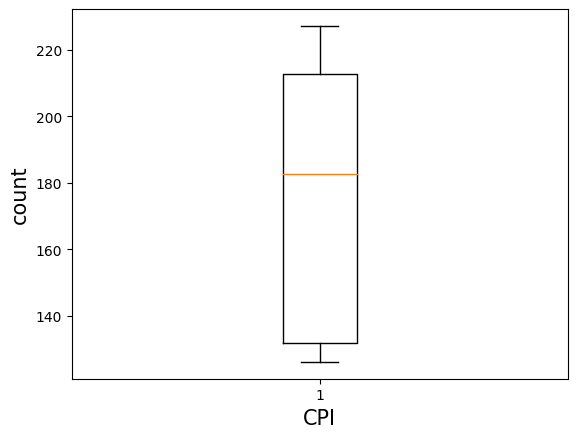

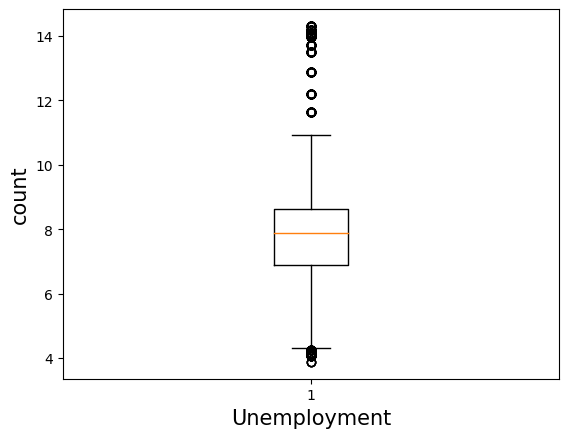

In [203]:
# plotting the outliers
for i in col:
    plt.boxplot(df[i])
    plt.xlabel(i, fontsize=15)
    plt.ylabel("count", fontsize=15)
    plt.show()
# weekly sales and employment has some outliers

<Axes: >

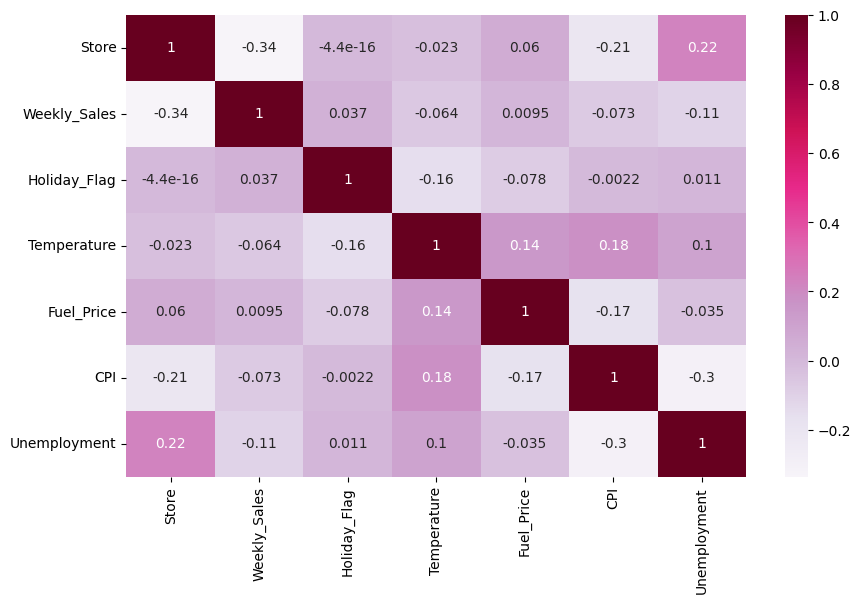

In [204]:
# checking correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="PuRd")
# weekly sales is not highly correlated with an other columns

In [205]:
# EDA - Exploratory Data Analysis

store_sales = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False).reset_index()
store_sales

Store  Weekly_Sales
0      20  3.013978e+08
1       4  2.995440e+08
2      14  2.889999e+08
3      13  2.865177e+08
4       2  2.753824e+08
5      10  2.716177e+08
6      27  2.538559e+08
7       6  2.237561e+08
8       1  2.224028e+08
9      39  2.074455e+08
10     19  2.066349e+08
11     31  1.996139e+08
12     23  1.987506e+08
13     24  1.940160e+08
14     11  1.939628e+08
15     28  1.892637e+08
16     41  1.813419e+08
17     32  1.668192e+08
18     18  1.551147e+08
19     22  1.470756e+08
20     12  1.442872e+08
21     26  1.434164e+08
22     34  1.382498e+08
23     40  1.378703e+08
24     35  1.315207e+08
25      8  1.299512e+08
26     17  1.277821e+08
27     45  1.123953e+08
28     21  1.081179e+08
29     25  1.010612e+08
30     43  9.056544e+07
31     15  8.913368e+07
32      7  8.159828e+07
33     42  7.956575e+07
34      9  7.778922e+07
35     29  7.714155e+07
36     16  7.425243e+07
37     37  7.420274e+07
38     30  6.271689e+07
39      3  5.758674e+07
40     38  5.515963e+07
41     36  5.341221e+07
42      5  4.547569e+07
43     44  4.329309e+07
44     33  3.716022e+07

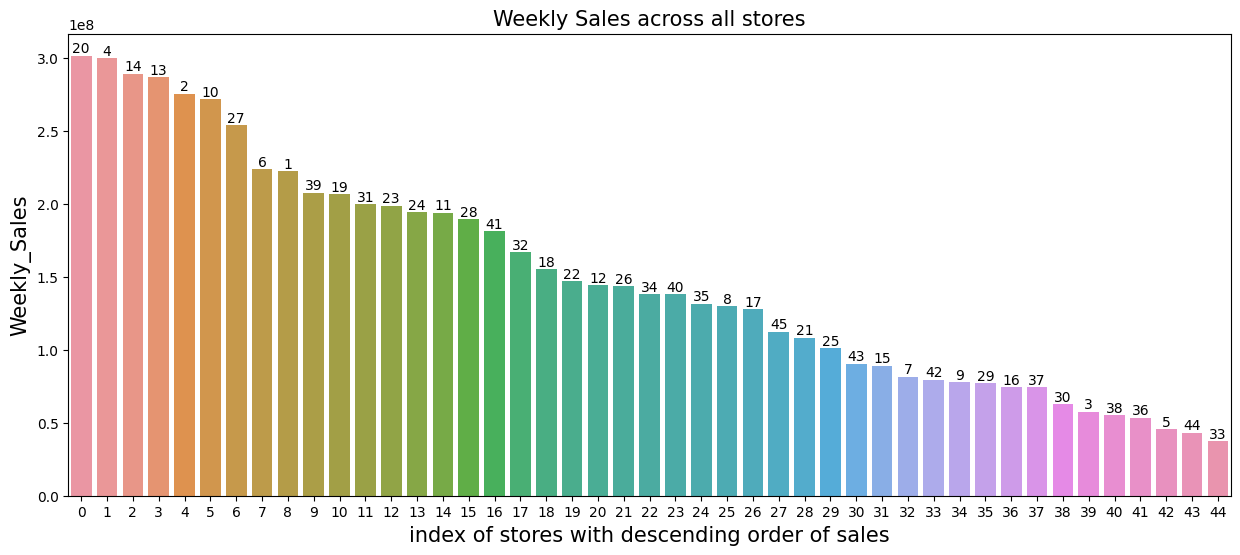

In [206]:
plt.figure(figsize=(15,6))
plt.title("Weekly Sales across all stores", fontsize=15)
plt.xlabel("index of stores with descending order of sales", fontsize=15)
plt.ylabel("Weekly Sales", fontsize=15)
ax = sns.barplot(y=store_sales.Weekly_Sales, x=store_sales.index)

for i, sales in enumerate(store_sales['Weekly_Sales']):
    ax.text(i, sales+100, str(store_sales['Store'][i]), ha='center', va='bottom')

In [207]:
# the above plot shows the weekly sales in descending orderacross all the stores.
# it ie evident that store-20 has the highest weekly sales whereas store-33 has the lowest weekly sales

Text(0, 0.5, 'Weekly Sales')

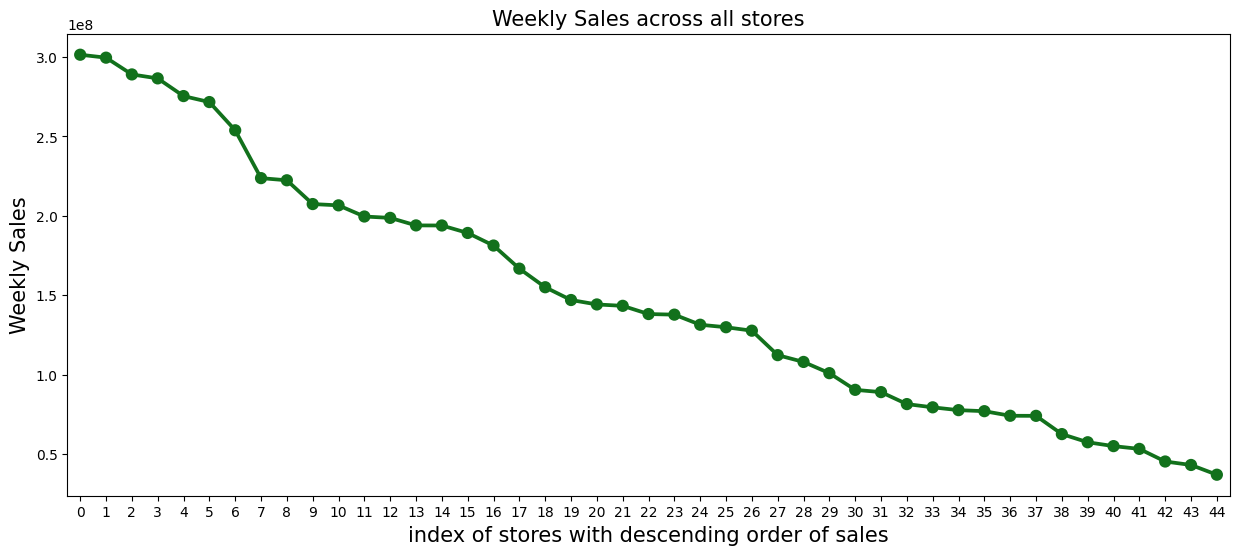

In [208]:
# the point plot of the above barplot
plt.figure(figsize=(15,6))
sns.pointplot(x=store_sales.index, y=store_sales.Weekly_Sales, color='g')
plt.title("Weekly Sales across all stores", fontsize=15)
plt.xlabel("index of stores with descending order of sales", fontsize=15)
plt.ylabel("Weekly Sales", fontsize=15)

In [209]:
# grouping weekly sales on the basis of holiday_flag
sales_holidays = df.groupby("Holiday_Flag").agg({"Holiday_Flag":"count", "Weekly_Sales":"sum"})
sales_holidays

# 1 – Holiday week, 0 – Non-holiday week

Holiday_Flag  Weekly_Sales
Holiday_Flag                            
0                     5985  6.231919e+09
1                      450  5.052996e+08

In [210]:
hol_sales = df.loc[df.Holiday_Flag == 1]
non_hol_sales = df.loc[df.Holiday_Flag == 0]

In [211]:
hol_sales.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1       1 2010-12-02    1641957.44             1        38.51       2.548   
31      1 2010-10-09    1507460.69             1        78.69       2.565   
42      1 2010-11-26    1955624.11             1        64.52       2.735   
47      1 2010-12-31    1367320.01             1        48.43       2.943   
53      1 2011-11-02    1649614.93             1        36.39       3.022   

           CPI  Unemployment  
1   211.242170         8.106  
31  211.495190         7.787  
42  211.748433         7.838  
47  211.404932         7.838  
53  212.936705         7.742

In [212]:
non_hol_sales.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   
5      1 2010-12-03    1439541.59             0        57.79       2.667   

          CPI  Unemployment  
0  211.096358         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
5  211.380643         8.106

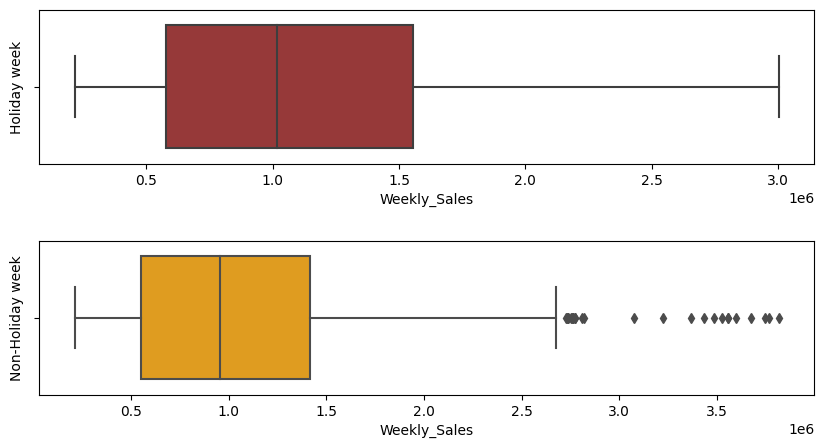

In [213]:
fig, axs = plt.subplots(2,1,figsize=(10,5))
plt.subplots_adjust(hspace=0.5)
ax = sns.boxplot(x=hol_sales.Weekly_Sales, ax = axs[0], color="brown")
ax.set(ylabel="Holiday week")
ax1 = sns.boxplot(x=non_hol_sales.Weekly_Sales, ax = axs[1], color="orange")
ax1.set(ylabel="Non-Holiday week")
plt.show()

In [214]:
# the above boxplots shows the weekly sales on holidays as well as non holidays
# non-holiday weekly sales has certain outliers
# on comparing the 2 boxplots, the median of weekly sales on holiday week is larger than that of non-holiday week
# hence the weekly sales on holidays are greater than on non-holiday week

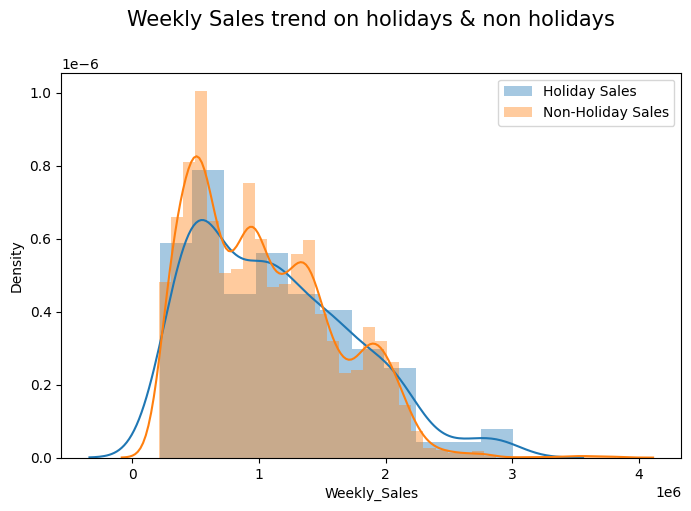

In [215]:
plt.figure(figsize=(8,5))
sns.distplot(hol_sales.Weekly_Sales, label="Holiday Sales")
sns.distplot(non_hol_sales.Weekly_Sales, label="Non-Holiday Sales")
plt.title("Weekly Sales trend on holidays & non holidays", y=1.1, fontsize=15)
plt.legend()

In [216]:
# the above plot shows the distribution of weekly sales over holiday weeks and non-holiday weeks

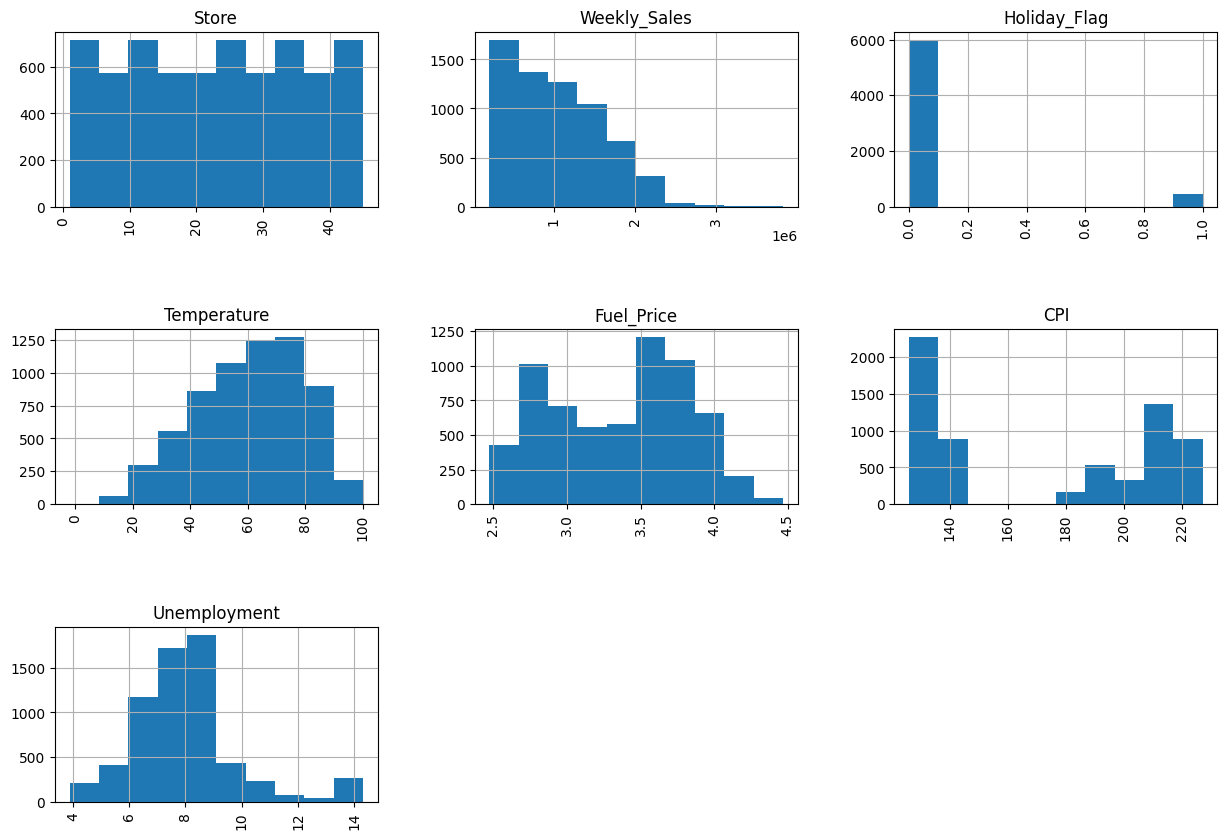

In [217]:
col = []
for i in df.columns:
    if df[i].dtype!= "datetime64[ns]":
        col.append(i)

df[col].hist(figsize=(15,10), xrot=90)
plt.subplots_adjust(hspace=0.7)
plt.show()

Text(0.5, 1.0, 'Weekly Sales Trend')

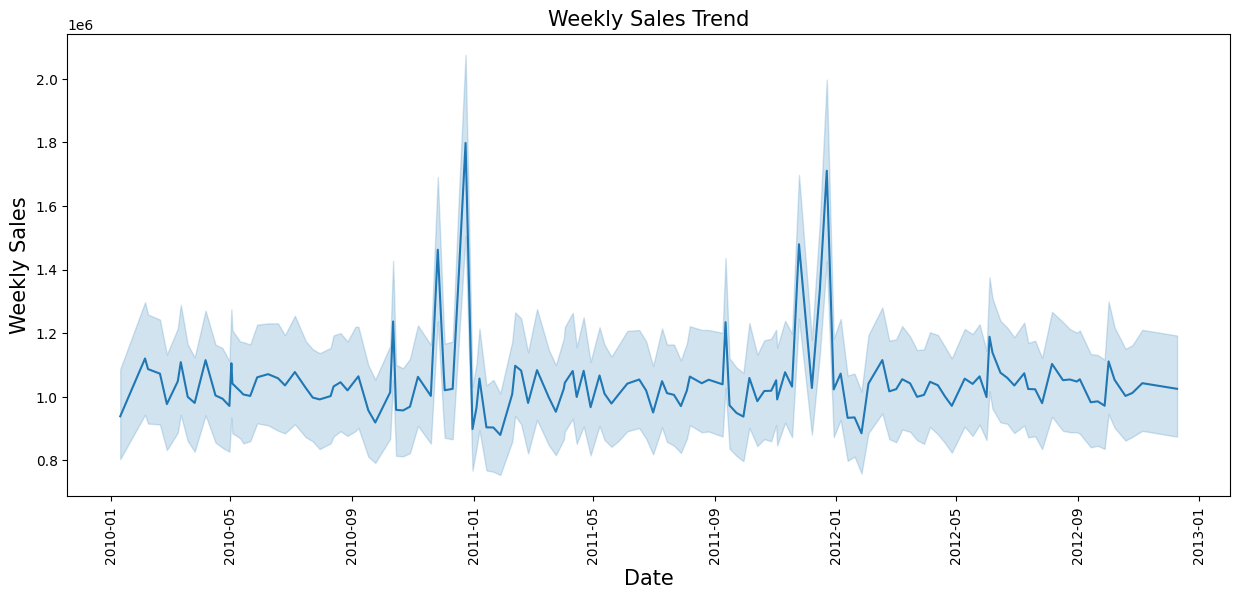

In [218]:
# to find the trend the data
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.lineplot(x=df.Date, y=df.Weekly_Sales)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Weekly Sales", fontsize=15)
plt.title("Weekly Sales Trend", fontsize=15)

In [219]:
# the weekly sales trend shows that a surge in weekly sales is seen towards the end of 2010 & 2011
# ie, a rise in weekly sales is seen from October to December ---> this is seasonality

In [220]:
df["Year"] = df.Date.dt.year
df["Month"] = df.Date.dt.month
df["Day"] = df.Date.dt.day
df

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Year  Month  Day  
0     211.096358         8.106  2010      5    2  
1     211.242170         8.106  2010     12    2  
2     211.289143         8.106  2010      2   19  
3     211.319643         8.106  2010      2   26  
4     211.350143         8.106  2010      5    3  
...          ...           ...   ...    ...  ...  
6430  192.013558         8.684  2012      9   28  
6431  192.170412         8.667  2012      5   10  
6432  192.327265         8.667  2012     12   10  
6433  192.330854         8.667  2012     10   19  
6434  192.308899         8.667  2012     10   26  

[6435 rows x 11 columns]

In [221]:
# aggregating the mean of weekly sales(month wise) for each year to anlayse the average sales distribution annualy

df_new = pd.crosstab(index=df.Month, columns=df.Year, values=df.Weekly_Sales, aggfunc="mean")
df_new

# Create a spreadsheet-style pivot table as a DataFrame.
# df.pivot_table(index="Month", columns="Year", values="Weekly_Sales") (this can also be used)

Year           2010          2011          2012
Month                                          
1      9.386639e+05  9.420697e+05  9.567817e+05
2      1.064372e+06  1.042273e+06  1.057997e+06
3      1.034590e+06  1.011263e+06  1.025510e+06
4      1.021177e+06  1.033220e+06  1.014127e+06
5      1.039303e+06  1.015565e+06  1.053948e+06
6      1.055082e+06  1.038471e+06  1.082920e+06
7      1.023702e+06  9.976049e+05  1.025480e+06
8      1.025212e+06  1.044895e+06  1.064514e+06
9      9.983559e+05  1.026810e+06  9.988663e+05
10     1.027201e+06  1.020663e+06  1.044885e+06
11     1.176097e+06  1.126535e+06  1.042797e+06
12     1.198413e+06  1.274311e+06  1.025078e+06

In [222]:
z = df.loc[(df.Month==1) & (df.Year==2010)]
z.Weekly_Sales.describe()

count    4.500000e+01
mean     9.386639e+05
std      4.843656e+05
min      2.242944e+05
25%      4.956922e+05
50%      8.657091e+05
75%      1.215273e+06
max      1.933719e+06
Name: Weekly_Sales, dtype: float64

In [223]:
df_new.columns

Int64Index([2010, 2011, 2012], dtype='int64', name='Year')

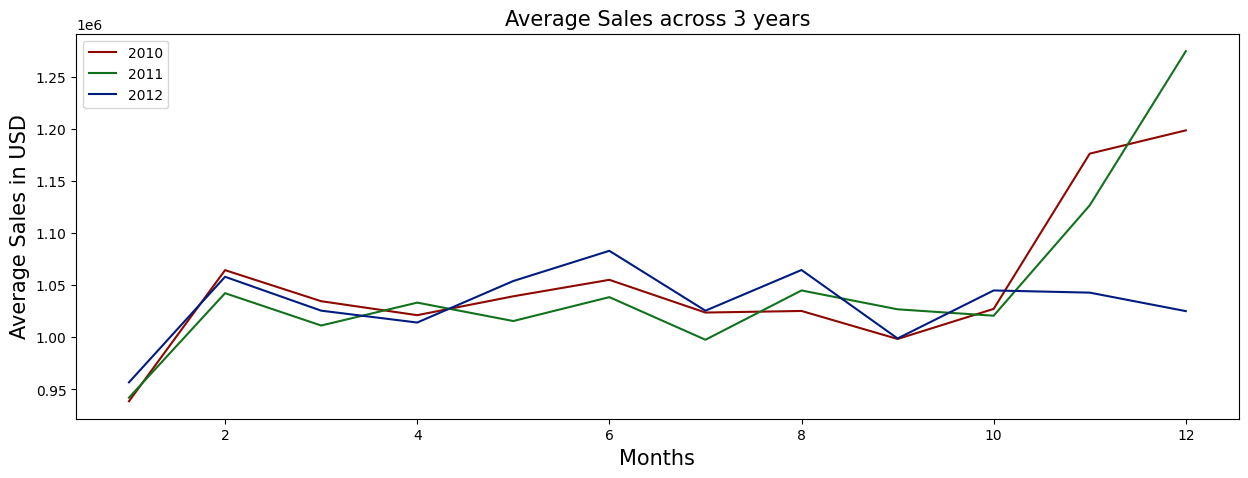

In [224]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df_new.index, y=df_new[2010], label="2010", color='r') # df_new.Month cannot be used since month is an index
sns.lineplot(x=df_new.index, y=df_new[2011], label="2011", color='g')
sns.lineplot(x=df_new.index, y=df_new[2012], label="2012", color='b')
plt.xlabel("Months", fontsize=15)
plt.ylabel("Average Sales in USD", fontsize=15)
plt.title("Average Sales across 3 years", fontsize=15)
plt.legend()

In [225]:
# from the above plot as well, it is seen that the average weekly sales rises towards the end for the years 2010, 2011 with
# the rise being clearly evident for the year 2011

In [226]:
px.histogram(x="Temperature", y="Weekly_Sales", data_frame=df, hover_name="Temperature", color="Holiday_Flag",
             opacity=0.8, title="Effect of temperature on weekly sales")

In [227]:
# for extreme temperatures, the weekly sales are low but for optimum temperaturesso

In [228]:
px.histogram(x="Fuel_Price", y="Weekly_Sales", data_frame=df, color="Holiday_Flag",opacity=0.8,
             title="Effect of fuel price on weekly sales")

In [229]:
px.histogram(data_frame=df, x='CPI', y='Weekly_Sales', color="Holiday_Flag", opacity=0.8,
             title="Effect of CPI on weekly sales")

In [230]:
px.histogram(data_frame=df, x='Unemployment', y='Weekly_Sales', color="Holiday_Flag", opacity=0.8,
             title="Effect of unemployment on weekly sales")

In [231]:
# Model building

In [232]:
x = df.iloc[:,:].drop(["Weekly_Sales", "Date"], axis=1)
x

Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0         1             0        42.31       2.572  211.096358         8.106   
1         1             1        38.51       2.548  211.242170         8.106   
2         1             0        39.93       2.514  211.289143         8.106   
3         1             0        46.63       2.561  211.319643         8.106   
4         1             0        46.50       2.625  211.350143         8.106   
...     ...           ...          ...         ...         ...           ...   
6430     45             0        64.88       3.997  192.013558         8.684   
6431     45             0        64.89       3.985  192.170412         8.667   
6432     45             0        54.47       4.000  192.327265         8.667   
6433     45             0        56.47       3.969  192.330854         8.667   
6434     45             0        58.85       3.882  192.308899         8.667   

      Year  Month  Day  
0     2010      5    2  
1     2010     12    2  
2     2010      2   19  
3     2010      2   26  
4     2010      5    3  
...    ...    ...  ...  
6430  2012      9   28  
6431  2012      5   10  
6432  2012     12   10  
6433  2012     10   19  
6434  2012     10   26  

[6435 rows x 9 columns]

In [233]:
y = df["Weekly_Sales"]
y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [236]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4504, 9)
(1931, 9)
(4504,)
(1931,)


In [237]:
from sklearn.linear_model import LinearRegression

In [238]:
model = LinearRegression()
model.fit(x_train, y_train)  # fitting the model

LinearRegression()

In [239]:
# prediction based on model training
y_pred = model.predict(x_test)
y_pred

array([1026252.05633488,  835238.94957757, 1209114.20720989, ...,
       1237187.78839558, 1411856.17517021,  818884.48682898])

In [240]:
errorTable = pd.DataFrame(columns=["Actual", "Predicted"])

In [241]:
errorTable["Actual"] = y_test
errorTable["Predicted"] = y_pred

In [242]:
errorTable["Error"] = errorTable["Actual"] - errorTable["Predicted"] # calculating the error
errorTable

Actual     Predicted         Error
3949  1220984.94  1.026252e+06  1.947329e+05
4555  1246322.44  8.352389e+05  4.110835e+05
2235   505918.21  1.209114e+06 -7.031960e+05
5204   527572.25  7.140859e+05 -1.865136e+05
3524   719235.07  1.046520e+06 -3.272846e+05
...          ...           ...           ...
2265   518045.09  1.088212e+06 -5.701666e+05
1284   558464.80  1.226214e+06 -6.677490e+05
658    292315.38  1.237188e+06 -9.448724e+05
1329  2939946.38  1.411856e+06  1.528090e+06
4285   425410.04  8.188845e+05 -3.934744e+05

[1931 rows x 3 columns]

In [243]:
from sklearn.metrics import *

In [244]:
r2_value = r2_score(y_test, y_pred)
r2_value

0.15980165002924285

In [245]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

520941.66163746564

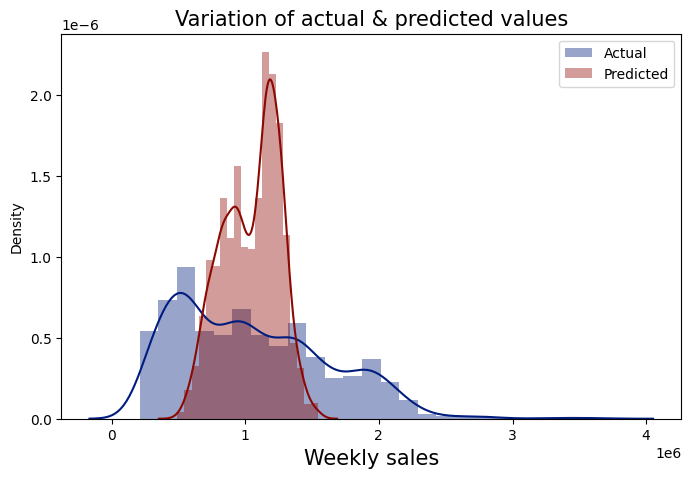

In [246]:
plt.figure(figsize=(8,5))
sns.distplot(errorTable.Actual,color="b", label="Actual")
sns.distplot(errorTable.Predicted, color="r", label="Predicted")
plt.title("Variation of actual & predicted values", fontsize=15)
plt.xlabel("Weekly sales", fontsize=15)
plt.legend()

In [247]:
errorTable = errorTable.reset_index()

In [248]:
errorTable.describe()

index        Actual     Predicted         Error
count  1931.000000  1.931000e+03  1.931000e+03  1.931000e+03
mean   3230.212325  1.052266e+06  1.045246e+06  7.020436e+03
std    1855.107744  5.684741e+05  2.102813e+05  5.210293e+05
min       1.000000  2.099862e+05  4.926199e+05 -1.038231e+06
25%    1596.500000  5.581914e+05  8.775511e+05 -3.808750e+05
50%    3240.000000  9.661451e+05  1.084512e+06 -2.947973e+04
75%    4814.000000  1.422969e+06  1.213280e+06  3.868800e+05
max    6434.000000  3.676389e+06  1.548121e+06  2.444912e+06

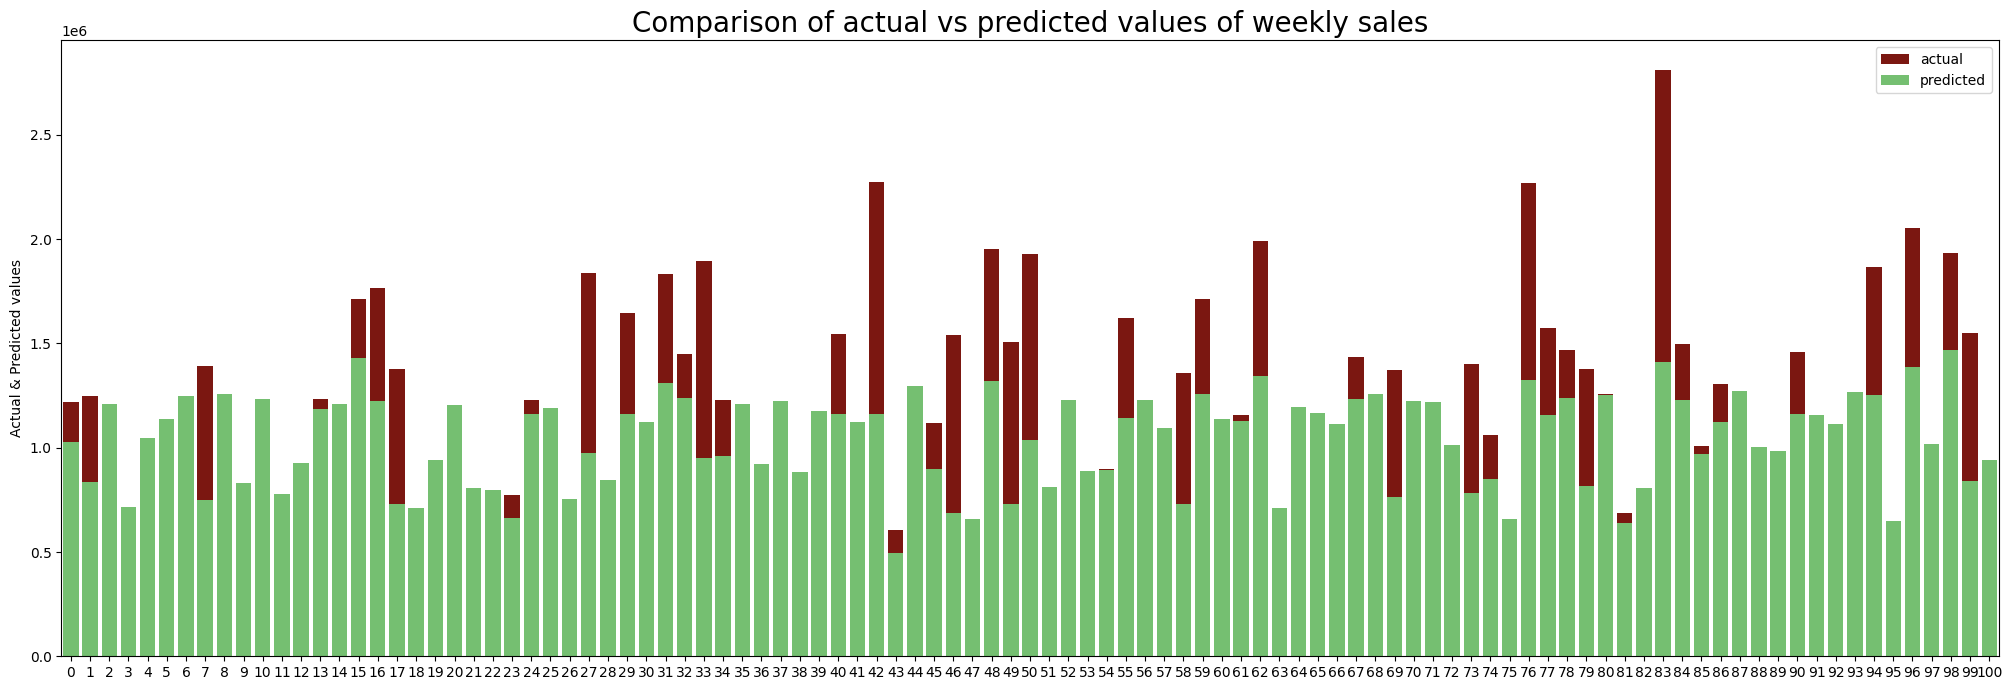

In [249]:
plt.figure(figsize=(25,8))
sns.set_color_codes("dark")
ax=sns.barplot(x=errorTable.index[:101], y=errorTable.Actual[:101], label="actual", color='r')
sns.set_color_codes("muted")
ax=sns.barplot(x=errorTable.index[:101], y=errorTable.Predicted[:101], label="predicted", color='g')
ax.set(ylabel = "Actual & Predicted values")
plt.title("Comparison of actual vs predicted values of weekly sales", fontsize=20)
plt.legend()

# TIME SERIES ANALYSIS

In [250]:
df_ts = pd.read_csv("Walmart (1).csv")
df_ts.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [251]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [252]:
df_ts.Store.value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

In [253]:
df_ts["Date"] = pd.to_datetime(df_ts.Date, format="%d-%m-%Y")

In [254]:
df_ts.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [255]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [256]:
df_ts.set_index(df_ts.Date, inplace=True)
df_ts

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  \
Date                                                                    
2010-02-05      1 2010-02-05    1643690.90             0        42.31   
2010-02-12      1 2010-02-12    1641957.44             1        38.51   
2010-02-19      1 2010-02-19    1611968.17             0        39.93   
2010-02-26      1 2010-02-26    1409727.59             0        46.63   
2010-03-05      1 2010-03-05    1554806.68             0        46.50   
...           ...        ...           ...           ...          ...   
2012-09-28     45 2012-09-28     713173.95             0        64.88   
2012-10-05     45 2012-10-05     733455.07             0        64.89   
2012-10-12     45 2012-10-12     734464.36             0        54.47   
2012-10-19     45 2012-10-19     718125.53             0        56.47   
2012-10-26     45 2012-10-26     760281.43             0        58.85   

            Fuel_Price         CPI  Unemployment  
Date                                              
2010-02-05       2.572  211.096358         8.106  
2010-02-12       2.548  211.242170         8.106  
2010-02-19       2.514  211.289143         8.106  
2010-02-26       2.561  211.319643         8.106  
2010-03-05       2.625  211.350143         8.106  
...                ...         ...           ...  
2012-09-28       3.997  192.013558         8.684  
2012-10-05       3.985  192.170412         8.667  
2012-10-12       4.000  192.327265         8.667  
2012-10-19       3.969  192.330854         8.667  
2012-10-26       3.882  192.308899         8.667  

[6435 rows x 8 columns]

In [257]:
del df_ts["Date"]

In [258]:
df_ts.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=6435, freq=None)

In [259]:
store6 = df_ts.loc[df_ts.Store==6]
store6

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      6    1652635.10             0        40.43       2.572   
2010-02-12      6    1606283.86             1        40.57       2.548   
2010-02-19      6    1567138.07             0        43.58       2.514   
2010-02-26      6    1432953.21             0        47.10       2.561   
2010-03-05      6    1601348.82             0        49.63       2.625   
...           ...           ...           ...          ...         ...   
2012-09-28      6    1369131.46             0        77.82       3.666   
2012-10-05      6    1518177.71             0        70.84       3.617   
2012-10-12      6    1459396.84             0        65.43       3.601   
2012-10-19      6    1436883.99             0        69.68       3.594   
2012-10-26      6    1431426.34             0        72.34       3.506   

                   CPI  Unemployment  
Date                                  
2010-02-05  212.622352         7.259  
2010-02-12  212.770042         7.259  
2010-02-19  212.816155         7.259  
2010-02-26  212.845337         7.259  
2010-03-05  212.874519         7.259  
...                ...           ...  
2012-09-28  224.602971         5.668  
2012-10-05  224.804222         5.329  
2012-10-12  225.005473         5.329  
2012-10-19  225.050101         5.329  
2012-10-26  225.068625         5.329  

[143 rows x 7 columns]

In [260]:
sales6 = pd.DataFrame(store6.groupby(store6.index)["Weekly_Sales"].sum())

In [261]:
sales6

Weekly_Sales
Date                    
2010-02-05    1652635.10
2010-02-12    1606283.86
2010-02-19    1567138.07
2010-02-26    1432953.21
2010-03-05    1601348.82
...                  ...
2012-09-28    1369131.46
2012-10-05    1518177.71
2012-10-12    1459396.84
2012-10-19    1436883.99
2012-10-26    1431426.34

[143 rows x 1 columns]

In [262]:
sales6.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)

Text(0.5, 1.0, 'Weekly sales of store-6')

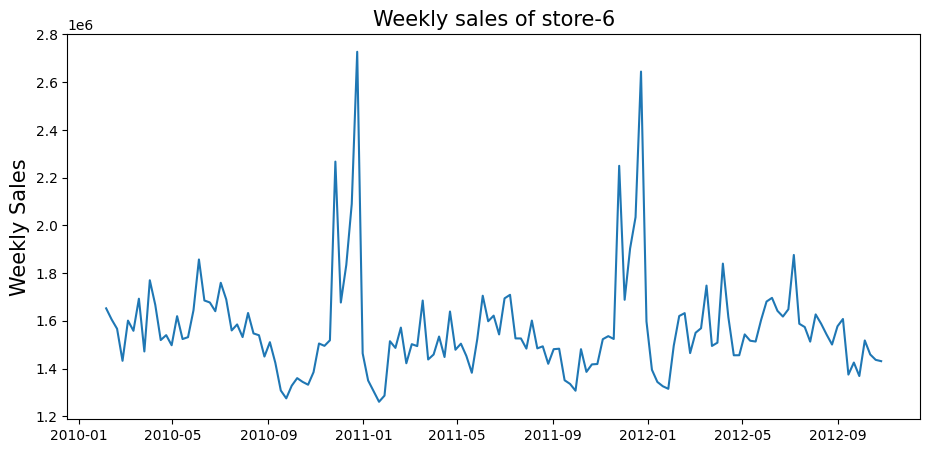

In [263]:
plt.figure(figsize=(11,5))
plt.plot(sales6.Weekly_Sales)
plt.ylabel("Weekly Sales", fontsize=15)
plt.title("Weekly sales of store-6", fontsize=15)

In [264]:
from statsmodels.tsa.seasonal import seasonal_decompose

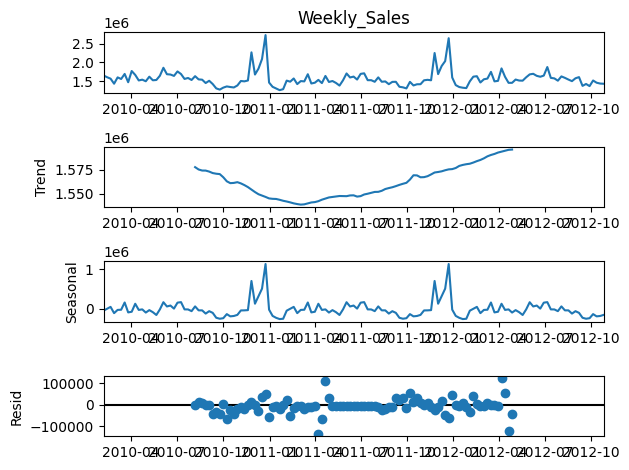

In [265]:
decomp = seasonal_decompose(store6.Weekly_Sales)
decomp.plot();

Text(0.5, 1.0, 'Seasonality in the weekly sales of store-6')

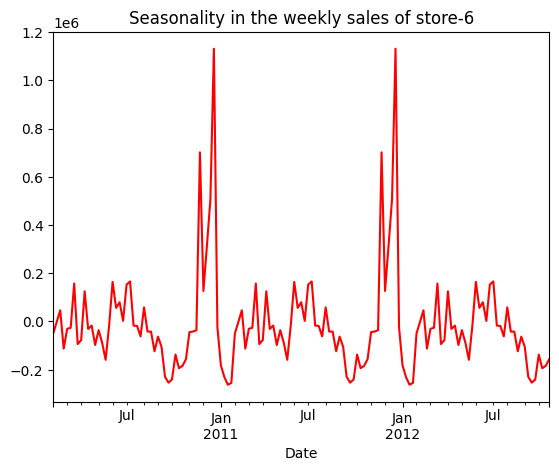

In [266]:
seasonality = decomp.seasonal
seasonality.plot(color="red")
plt.title("Seasonality in the weekly sales of store-6")

In [267]:
from statsmodels.tsa.stattools import adfuller, kpss

In [268]:
adf = adfuller(sales6)
adf

(-5.492502135779504,
 2.1594858682169703e-06,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 3474.9714643671264)

In [269]:
if(adf[1] < 0.05):
    print("data is stationary")
else:
    print("data is not stationary")

data is stationary


In [270]:
kps = kpss(sales6)
kps

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




(0.03489802605610485,
 0.1,
 6,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [271]:
if(kps[1] < 0.05):
    print("data is not stationary")
else:
    print("data is stationary")

data is stationary


In [272]:
from pandas.plotting import autocorrelation_plot

In [273]:
from statsmodels.graphics.tsaplots import plot_acf

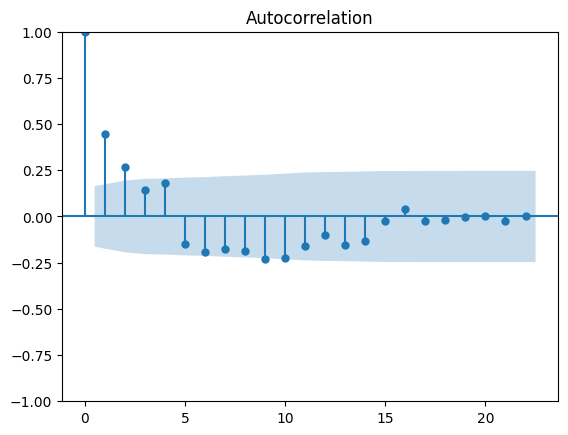

In [274]:
plot_acf(sales6);

In [275]:
from statsmodels.graphics.tsaplots import plot_pacf

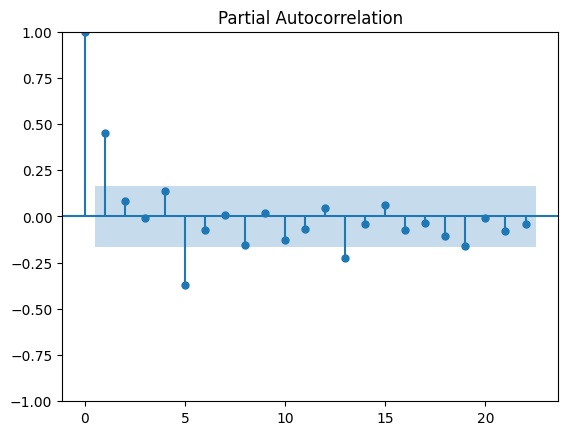

In [276]:
plot_pacf(sales6);

In [277]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.0 MB/s eta 0:00:00


In [278]:
from pmdarima import auto_arima

In [279]:
stepwise_fit = auto_arima(sales6, trace=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3890.782, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3917.123, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3887.129, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3897.124, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4489.694, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3888.171, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3888.510, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3890.197, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3934.853, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.311 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1940.564
Date:                Sat, 17 Jun 2023   AIC                           3887.129
Time:                        09:11:15   BIC                           3896.017
Sample:                    02-05-2010   HQIC                          3890.740
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.603e+05   7.59e+04     11.333      0.000    7.11e+05    1.01e+06
ar.L1          0.4501      0.040     11.274      0.000       0.372       0.528
sigma2      3.601e+10      0.958   3.76e+10      0.000     3.6e+10     3.6e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):               531.16
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             2.02
Prob(H) (two-sided):                  0.20   Kurtosis:                        11.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.73e+25. Standard errors may be unstable.
"""

In [280]:
train = sales6.iloc[:100]
test = sales6.iloc[100:]

In [281]:
train.shape, test.shape

((100, 1), (43, 1))

In [282]:
train.head()

Weekly_Sales
Date                    
2010-02-05    1652635.10
2010-02-12    1606283.86
2010-02-19    1567138.07
2010-02-26    1432953.21
2010-03-05    1601348.82

In [283]:
test.head()

Weekly_Sales
Date                    
2012-01-06    1395339.71
2012-01-13    1344243.17
2012-01-20    1326255.70
2012-01-27    1315610.66
2012-02-03    1496305.78

In [284]:
from statsmodels.tsa.arima.model import ARIMA

In [285]:
arima = ARIMA(train, order=(1,0,0)).fit()
arima.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1369.610
Date:                Sat, 17 Jun 2023   AIC                           2745.219
Time:                        09:11:15   BIC                           2753.035
Sample:                    02-05-2010   HQIC                          2748.382
                         - 12-30-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.574e+06   4.89e+04     32.178      0.000    1.48e+06    1.67e+06
ar.L1          0.4407      0.053      8.248      0.000       0.336       0.545
sigma2      4.642e+10      0.490   9.47e+10      0.000    4.64e+10    4.64e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):               250.57
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               5.58   Skew:                             1.92
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.63e+25. Standard errors may be unstable.
"""

In [286]:
arimapred = arima.predict(start=len(train), end=len(train)+len(test)-1, typ="levels")
arimapred

2012-01-06    1.584841e+06
2012-01-13    1.579007e+06
2012-01-20    1.576436e+06
2012-01-27    1.575303e+06
2012-02-03    1.574804e+06
2012-02-10    1.574584e+06
2012-02-17    1.574487e+06
2012-02-24    1.574444e+06
2012-03-02    1.574426e+06
2012-03-09    1.574417e+06
2012-03-16    1.574414e+06
2012-03-23    1.574412e+06
2012-03-30    1.574411e+06
2012-04-06    1.574411e+06
2012-04-13    1.574411e+06
2012-04-20    1.574411e+06
2012-04-27    1.574411e+06
2012-05-04    1.574411e+06
2012-05-11    1.574411e+06
2012-05-18    1.574411e+06
2012-05-25    1.574411e+06
2012-06-01    1.574411e+06
2012-06-08    1.574411e+06
2012-06-15    1.574411e+06
2012-06-22    1.574411e+06
2012-06-29    1.574411e+06
2012-07-06    1.574411e+06
2012-07-13    1.574411e+06
2012-07-20    1.574411e+06
2012-07-27    1.574411e+06
2012-08-03    1.574411e+06
2012-08-10    1.574411e+06
2012-08-17    1.574411e+06
2012-08-24    1.574411e+06
2012-08-31    1.574411e+06
2012-09-07    1.574411e+06
2012-09-14    1.574411e+06
2

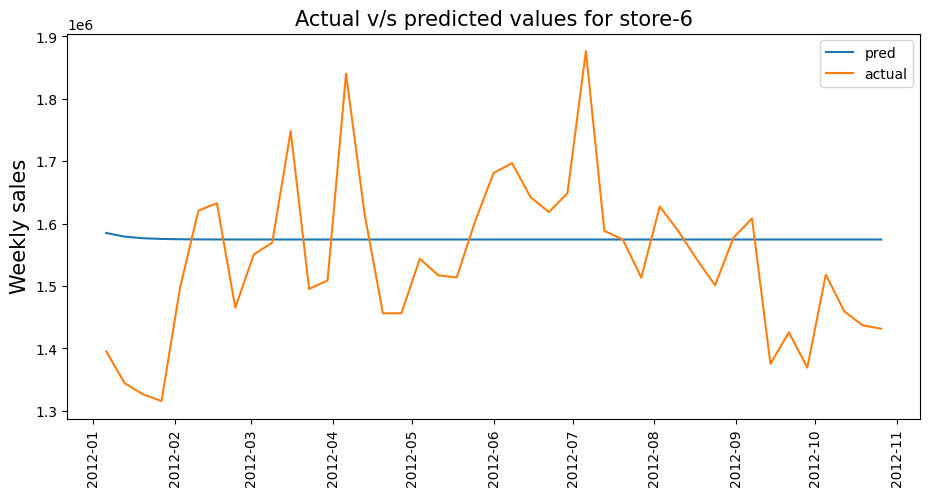

In [287]:
plt.figure(figsize=(11,5))
plt.xticks(rotation=90)
plt.plot(arimapred, label="pred")
plt.plot(test, label="actual")
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Actual v/s predicted values for store-6", fontsize=15)
plt.legend()

Text(0.5, 1.0, 'Arima prediction on test set')

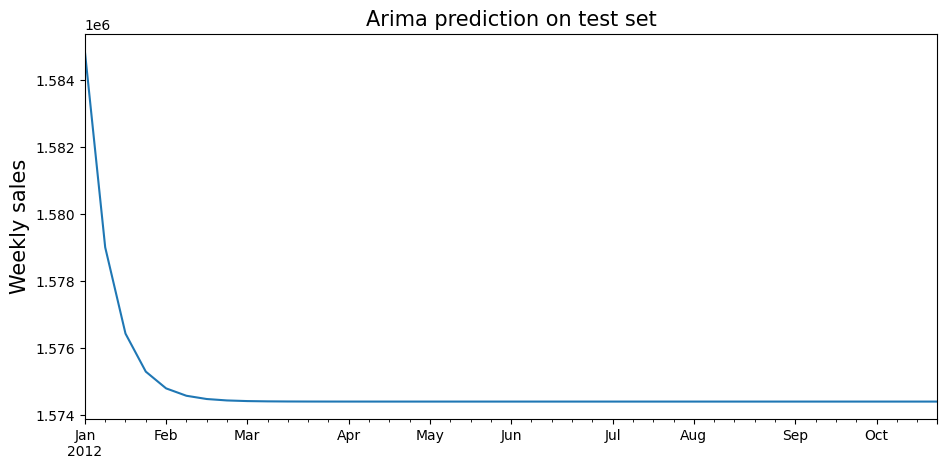

In [288]:
arimapred.plot(figsize=(11,5))
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Arima prediction on test set", fontsize=15)

In [289]:
store6["Predict"] = arimapred

Text(0.5, 1.0, 'Weekly sales with arima predicted values')

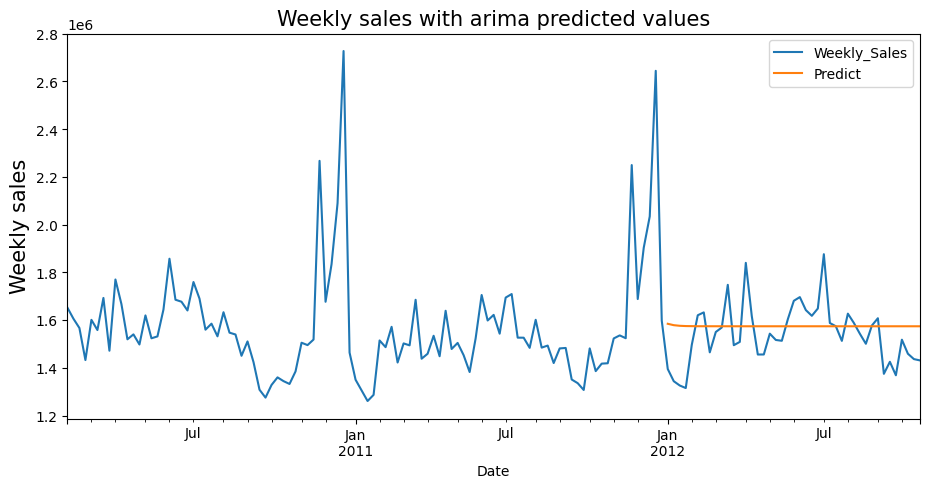

In [290]:
store6[["Weekly_Sales", "Predict"]].plot(figsize=(11,5))
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Weekly sales with arima predicted values", fontsize=15)

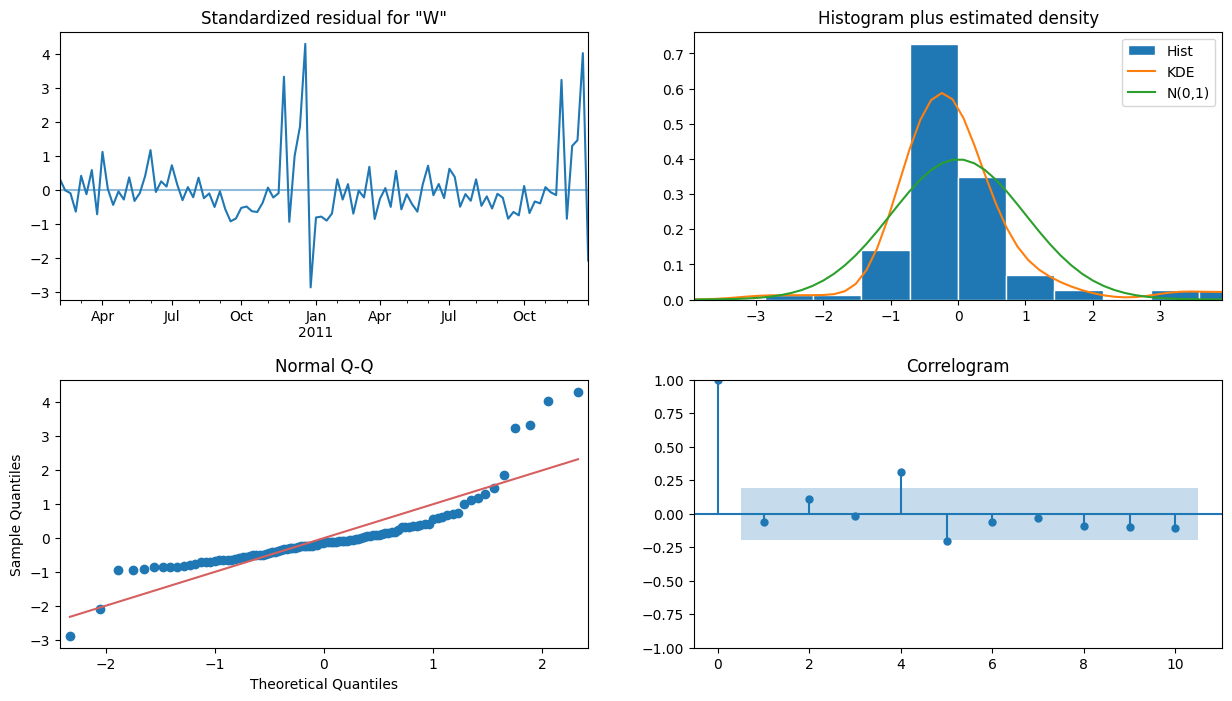

In [291]:
arima.plot_diagnostics(figsize=(15,8));
plt.subplots_adjust(hspace=0.3)

In [292]:
# The plot_diagnostics function provides four diagnostic plots:

# Histogram plot of the residuals: This plot allows us to visually inspect whether the residuals are normally distributed.
# A normal distribution is important because it is assumed in many statistical tests.

# Normal Q-Q plot: This plot compares the distribution of the residuals to a theoretical normal distribution.
# If the residuals are normally distributed, the points in the plot will follow a straight line.

# Correlogram or Autocorrelation Function (ACF) plot: This plot shows the correlation of the residuals at different lags.
# If the residuals are white noise, there should be no significant correlation at any lag.

# Partial Autocorrelation Function (PACF) plot: This plot shows the partial correlation of the residuals at different lags.
# It can be used to identify the order of the AR or MA terms in the ARIMA model.

# By examining these plots, you can determine whether the ARIMA model is a good fit for the data.

In [293]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [294]:
stepwise_fit2 = auto_arima(sales6, m=52, seasonal=True, trace=True)
stepwise_fit2.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=3834.394, Time=12.91 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=3917.123, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=3858.690, Time=6.45 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=3864.417, Time=1.94 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=4489.694, Time=0.06 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=3849.311, Time=16.23 sec
 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=3832.571, Time=10.26 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=3890.782, Time=0.57 sec
 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=3834.508, Time=41.46 sec
 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=3836.391, Time=46.99 sec
 ARIMA(1,0,2)(1,0,0)[52] intercept   : AIC=3836.917, Time=3.68 sec
 ARIMA(2,0,1)(1,0,0)[52] intercept   : AIC=3838.669, Time=10.29 sec
 ARIMA(3,0,2)(1,0,0)[52] intercept   : AIC=3832.724, Time=7.44 sec
 ARIMA(2,0,3)(1,0,0)[52] intercept   : AIC=3840.902, Time=7.38 sec
 ARIMA(1,0,1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  143
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 52)   Log Likelihood               -1909.285
Date:                             Sat, 17 Jun 2023   AIC                           3832.571
Time:                                     09:14:43   BIC                           3853.311
Sample:                                 02-05-2010   HQIC                          3840.999
                                      - 10-26-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.326e+05   2.63e-07   3.54e+12      0.000    9.33e+05    9.33e+05
ar.L1         -0.6618      0.322     -2.053      0.040      -1.294      -0.030
ar.L2         -0.1004      0.378     -0.266      0.790      -0.841       0.640
ma.L1          1.1690      0.331      3.533      0.000       0.521       1.818
ma.L2          0.6138      0.173      3.549      0.000       0.275       0.953
ar.S.L52       0.6644      0.045     14.845      0.000       0.577       0.752
sigma2      3.444e+10   8.43e-12   4.08e+21      0.000    3.44e+10    3.44e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               310.10
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.52e+37. Standard errors may be unstable.
"""

In [295]:
sarima = SARIMAX(train, order=(2,0,2), seasonal_order=(1,0,0,52)).fit()
sarima.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        Weekly_Sales   No. Observations:                  100
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 52)   Log Likelihood               -1358.969
Date:                             Sat, 17 Jun 2023   AIC                           2729.937
Time:                                     09:14:46   BIC                           2745.568
Sample:                                 02-05-2010   HQIC                          2736.264
                                      - 12-30-2011                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0847      0.831      0.102      0.919      -1.544       1.713
ar.L2          0.8980      0.841      1.068      0.285      -0.750       2.546
ma.L1          0.4048      0.870      0.465      0.642      -1.300       2.110
ma.L2         -0.3938      0.562     -0.700      0.484      -1.496       0.708
ar.S.L52       0.6054      0.077      7.851      0.000       0.454       0.757
sigma2      4.799e+10   4.97e-11   9.65e+20      0.000     4.8e+10     4.8e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               274.07
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.11
Prob(H) (two-sided):                  0.79   Kurtosis:                        11.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.22e+37. Standard errors may be unstable.
"""

In [296]:
sarimapred = sarima.predict(start=len(train), end=len(train)+len(test)-1)
sarimapred

2012-01-06    1.620584e+06
2012-01-13    1.553739e+06
2012-01-20    1.549253e+06
2012-01-27    1.530814e+06
2012-02-03    1.686342e+06
2012-02-10    1.640254e+06
2012-02-17    1.705100e+06
2012-02-24    1.589586e+06
2012-03-02    1.647827e+06
2012-03-09    1.621293e+06
2012-03-16    1.743818e+06
2012-03-23    1.575519e+06
2012-03-30    1.592781e+06
2012-04-06    1.621872e+06
2012-04-13    1.572721e+06
2012-04-20    1.673501e+06
2012-04-27    1.577842e+06
2012-05-04    1.580230e+06
2012-05-11    1.549114e+06
2012-05-18    1.494833e+06
2012-05-25    1.579361e+06
2012-06-01    1.678705e+06
2012-06-08    1.612264e+06
2012-06-15    1.616872e+06
2012-06-22    1.566793e+06
2012-06-29    1.649477e+06
2012-07-06    1.655561e+06
2012-07-13    1.536848e+06
2012-07-20    1.533382e+06
2012-07-27    1.500016e+06
2012-08-03    1.567608e+06
2012-08-10    1.489871e+06
2012-08-17    1.491210e+06
2012-08-24    1.440183e+06
2012-08-31    1.473225e+06
2012-09-07    1.468008e+06
2012-09-14    1.383847e+06
2

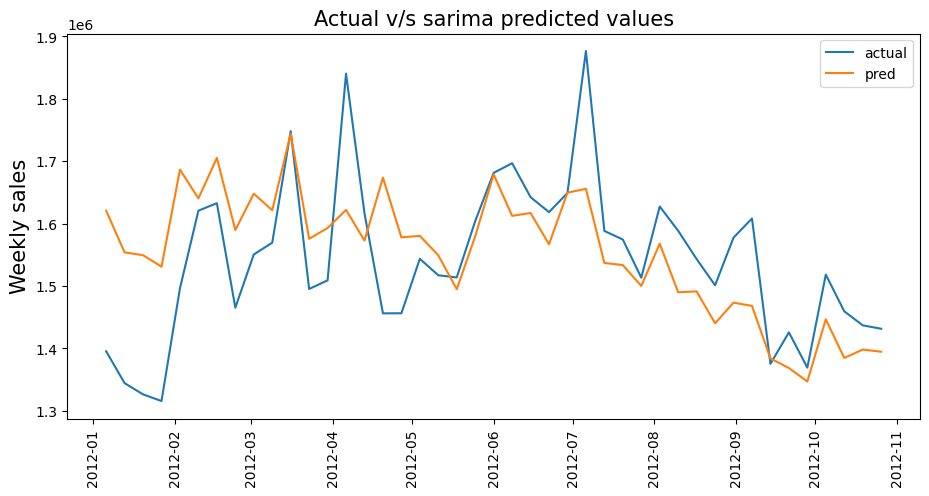

In [297]:
plt.figure(figsize=(11,5))
plt.xticks(rotation=90)
plt.plot(test, label="actual")
plt.plot(sarimapred, label="pred")
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Actual v/s sarima predicted values", fontsize=15)
plt.legend()

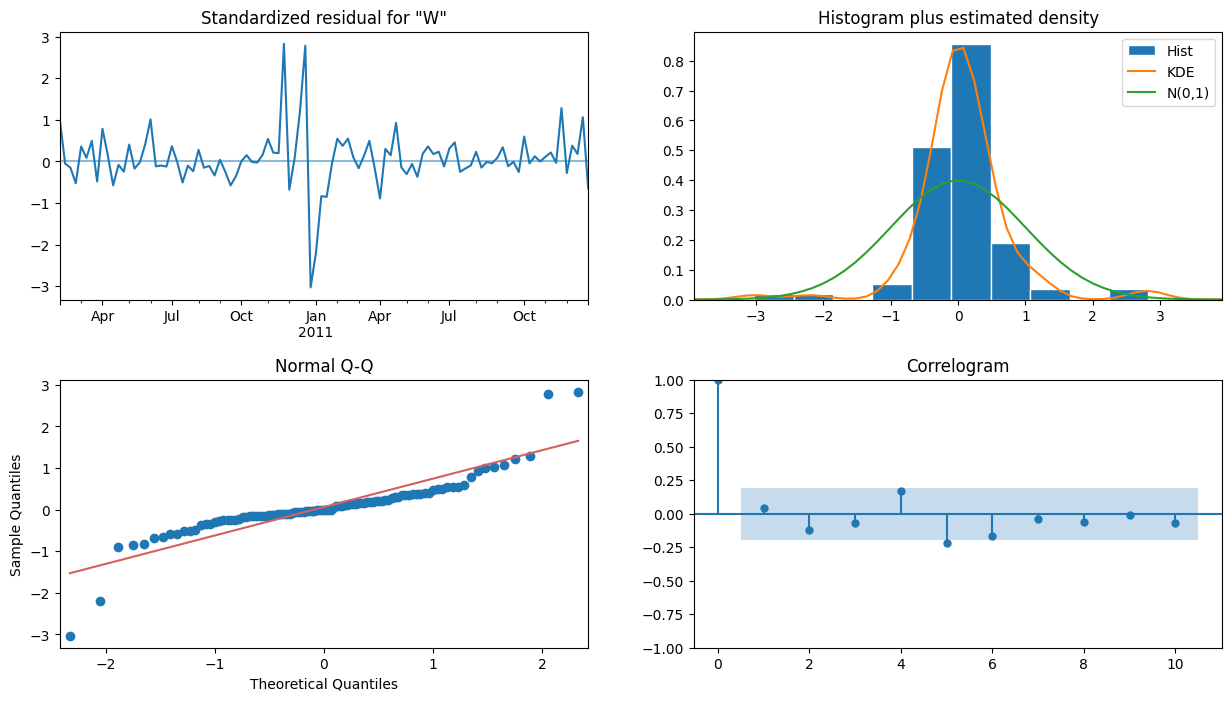

In [298]:
sarima.plot_diagnostics(figsize=(15,8));
plt.subplots_adjust(hspace=0.3)

In [299]:
store6["Sarimapred"] = sarimapred

Text(0.5, 1.0, 'Weekly sales with sarima predicted values for store-6')

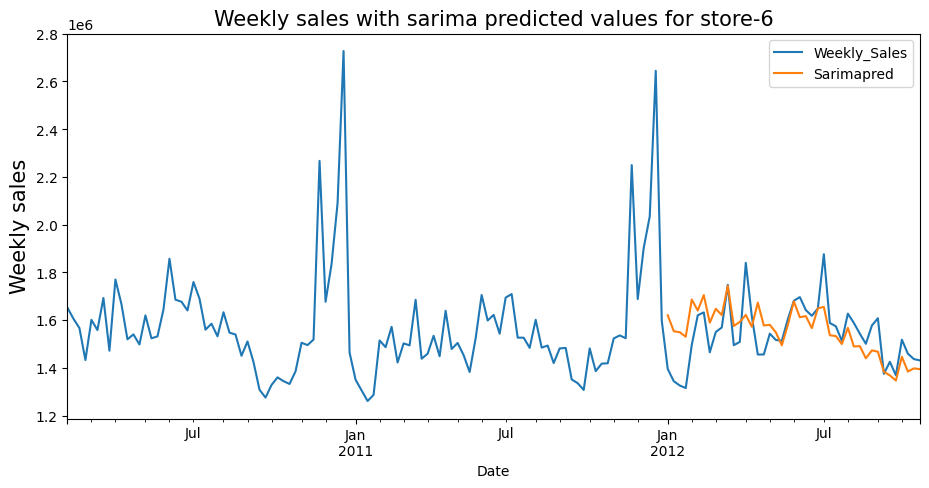

In [300]:
store6[["Weekly_Sales","Sarimapred"]].plot(figsize=(11,5))
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Weekly sales with sarima predicted values for store-6", fontsize=15)

In [301]:
sales6.tail()

Weekly_Sales
Date                    
2012-09-28    1369131.46
2012-10-05    1518177.71
2012-10-12    1459396.84
2012-10-19    1436883.99
2012-10-26    1431426.34

In [302]:
futurePred = sarima.get_prediction(start="2012-11-02", end="2013-01-25")
futurePred

In [303]:
futurePred.predicted_mean

2012-11-02    1.452160e+06
2012-11-09    1.455530e+06
2012-11-16    1.443177e+06
2012-11-23    1.877991e+06
2012-11-30    1.533143e+06
2012-12-07    1.658879e+06
2012-12-14    1.733469e+06
2012-12-21    2.098413e+06
2012-12-28    1.460068e+06
2013-01-04    1.469420e+06
2013-01-11    1.424308e+06
2013-01-18    1.417363e+06
2013-01-25    1.401672e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64

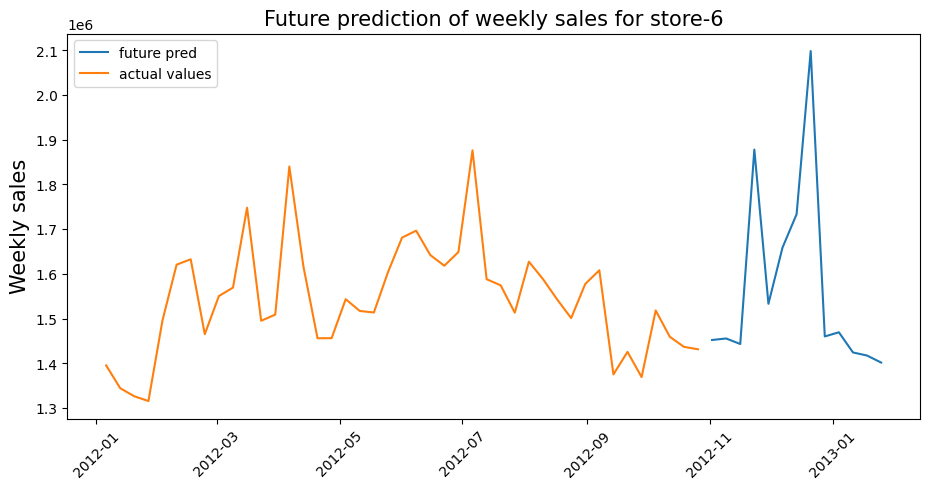

In [304]:
plt.figure(figsize=(11,5))
plt.xticks(rotation=45)
plt.plot(futurePred.predicted_mean, label="future pred")
plt.plot(test, label="actual values")
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Future prediction of weekly sales for store-6", fontsize=15)
plt.legend()

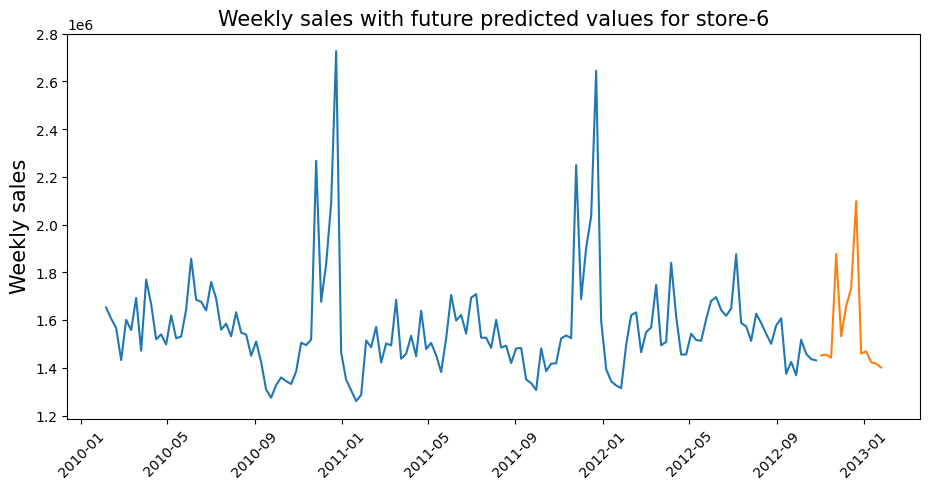

In [305]:
plt.figure(figsize=(11,5))
plt.xticks(rotation=45)
plt.plot(sales6)
plt.plot(futurePred.predicted_mean)
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Weekly sales with future predicted values for store-6", fontsize=15)
plt.show()

In [306]:
# taking another random store (say store-20)

In [307]:
store20 = df_ts.loc[df_ts.Store == 20]
store20

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05     20    2401395.47             0        25.92       2.784   
2010-02-12     20    2109107.90             1        22.12       2.773   
2010-02-19     20    2161549.76             0        25.43       2.745   
2010-02-26     20    1898193.95             0        32.32       2.754   
2010-03-05     20    2119213.72             0        31.75       2.777   
...           ...           ...           ...          ...         ...   
2012-09-28     20    2008350.58             0        58.65       3.997   
2012-10-05     20    2246411.89             0        60.77       3.985   
2012-10-12     20    2162951.36             0        47.20       4.000   
2012-10-19     20    1999363.49             0        56.26       3.969   
2012-10-26     20    2031650.55             0        60.04       3.882   

                   CPI  Unemployment  
Date                                  
2010-02-05  204.247194         8.187  
2010-02-12  204.385747         8.187  
2010-02-19  204.432100         8.187  
2010-02-26  204.463087         8.187  
2010-03-05  204.494073         8.187  
...                ...           ...  
2012-09-28  215.736716         7.280  
2012-10-05  215.925886         7.293  
2012-10-12  216.115057         7.293  
2012-10-19  216.146470         7.293  
2012-10-26  216.151590         7.293  

[143 rows x 7 columns]

In [308]:
sales20 = pd.DataFrame(store20.groupby(store20.index)["Weekly_Sales"].sum())
sales20

Weekly_Sales
Date                    
2010-02-05    2401395.47
2010-02-12    2109107.90
2010-02-19    2161549.76
2010-02-26    1898193.95
2010-03-05    2119213.72
...                  ...
2012-09-28    2008350.58
2012-10-05    2246411.89
2012-10-12    2162951.36
2012-10-19    1999363.49
2012-10-26    2031650.55

[143 rows x 1 columns]

Text(0.5, 1.0, 'Weekly sales of store-20 v/s store-6')

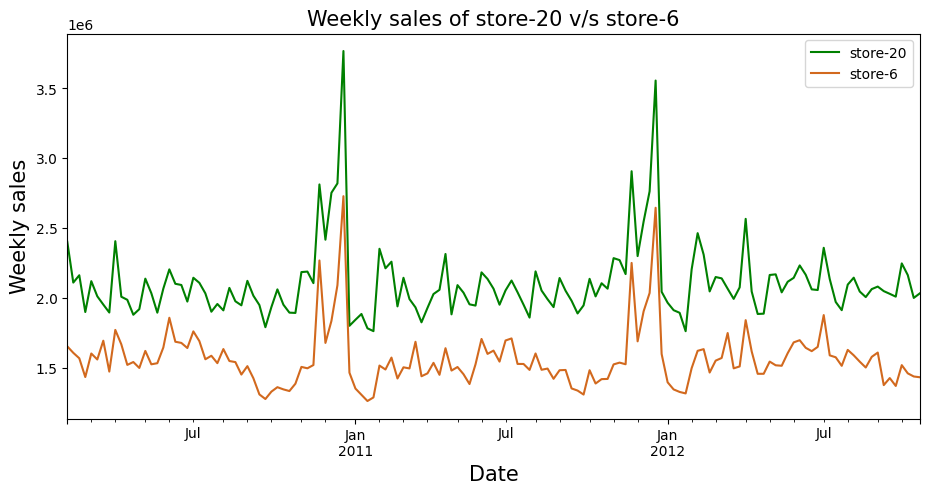

In [309]:
sales20.Weekly_Sales.plot(label="store-20", color="green", legend=True, figsize=(11,5))
sales6.Weekly_Sales.plot(label="store-6", color="chocolate", legend=True, figsize=(11,5))
plt.xlabel("Date", fontsize=15)
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Weekly sales of store-20 v/s store-6", fontsize=15)

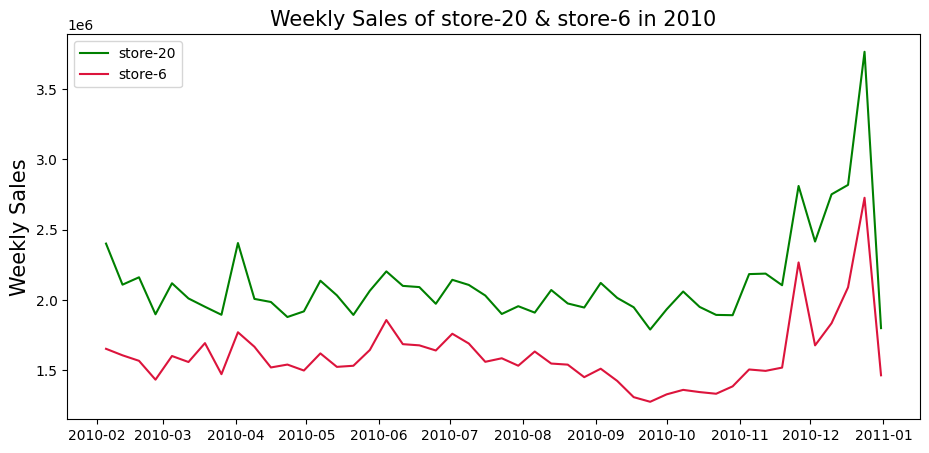

In [310]:
plt.figure(figsize=(11,5))
plt.plot(sales20['2010'], color="green", label="store-20")
plt.plot(sales6['2010'], color="crimson", label="store-6")
plt.ylabel("Weekly Sales", fontsize=15)
plt.title("Weekly Sales of store-20 & store-6 in 2010", fontsize=15)
plt.legend()

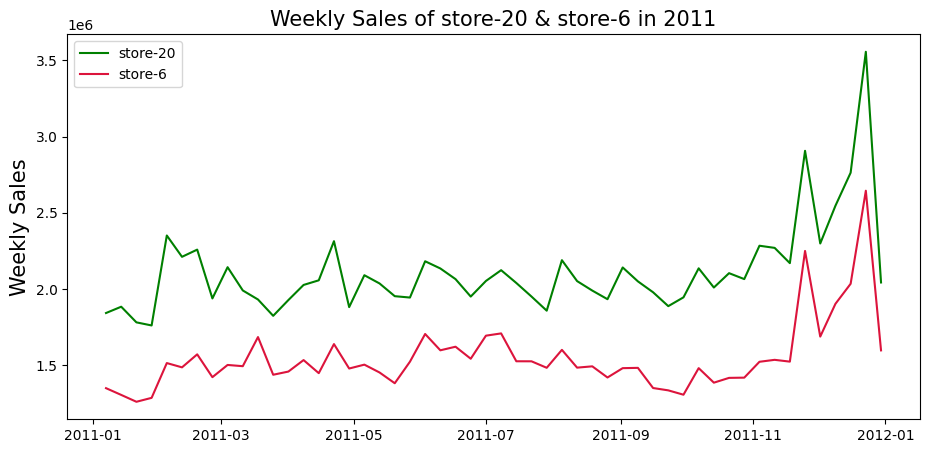

In [311]:
plt.figure(figsize=(11,5))
plt.plot(sales20['2011'], color="green", label="store-20")
plt.plot(sales6['2011'], color="crimson", label="store-6")
plt.ylabel("Weekly Sales", fontsize=15)
plt.title("Weekly Sales of store-20 & store-6 in 2011", fontsize=15)
plt.legend()

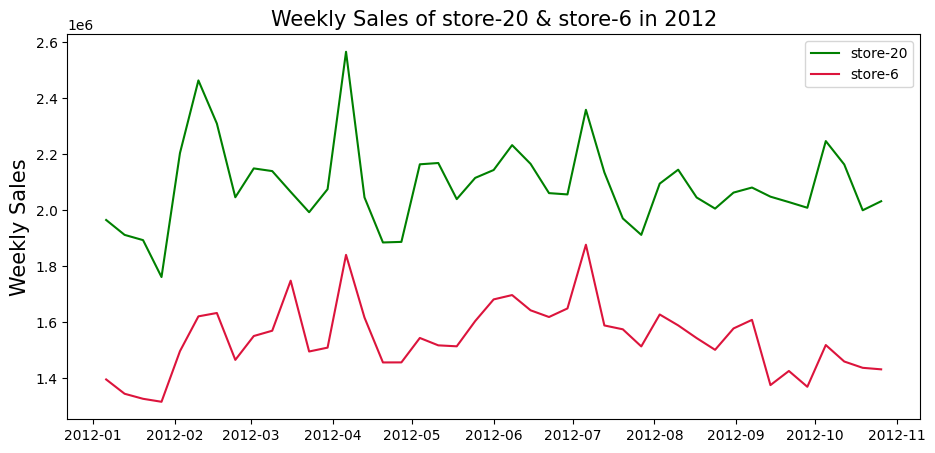

In [312]:
plt.figure(figsize=(11,5))
plt.plot(sales20['2012'], color="green", label="store-20")
plt.plot(sales6['2012'], color="crimson", label="store-6")
plt.ylabel("Weekly Sales", fontsize=15)
plt.title("Weekly Sales of store-20 & store-6 in 2012", fontsize=15)
plt.legend()

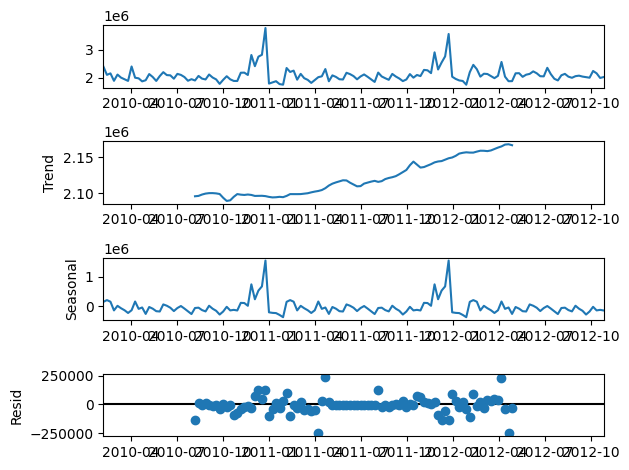

In [313]:
decomp2 = seasonal_decompose(sales20)
decomp2.plot();

In [314]:
adf2 = adfuller(sales20)
adf2

(-5.39373869285483,
 3.4912952838128377e-06,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 3553.6598733693677)

In [315]:
if(adf2[1] < 0.05):
    print("data is stationary")
else:
    print("data is not stationary")

data is stationary


In [316]:
kps2 = kpss(sales20)
kps2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




(0.09542216600395025,
 0.1,
 5,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [317]:
if(kps2[1] < 0.05):
    print("data is not stationary")
else:
    print("data is stationary")

data is stationary


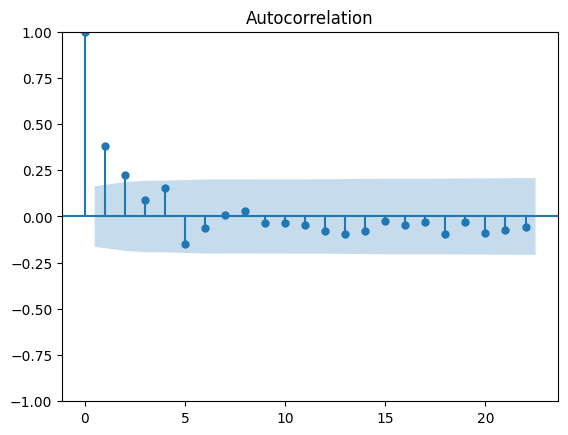

In [318]:
plot_acf(sales20);

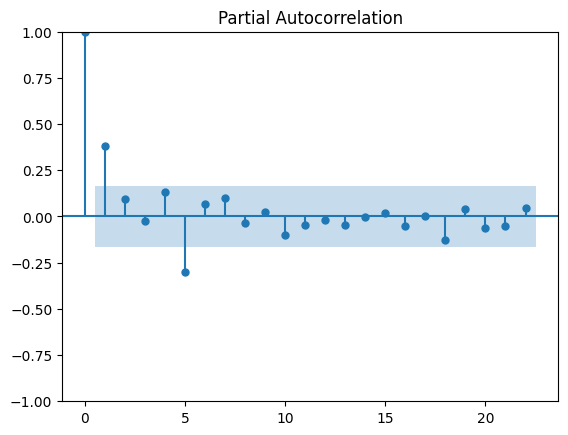

In [319]:
plot_pacf(sales20);

In [320]:
train = sales20[:100]
test = sales20[100:]

In [321]:
train.shape, test.shape

((100, 1), (43, 1))

In [322]:
stepwise_fit20 = auto_arima(sales20, trace=True)
stepwise_fit20.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3974.854, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3991.763, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3971.424, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3977.707, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4574.703, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3972.263, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3972.813, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3974.255, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.758 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1982.712
Date:                Sat, 17 Jun 2023   AIC                           3971.424
Time:                        09:14:55   BIC                           3980.313
Sample:                    02-05-2010   HQIC                          3975.036
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.304e+06   1.01e+05     12.964      0.000    1.11e+06     1.5e+06
ar.L1          0.3815      0.038     10.058      0.000       0.307       0.456
sigma2      6.452e+10      0.934   6.91e+10      0.000    6.45e+10    6.45e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               674.61
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             1.98
Prob(H) (two-sided):                  0.17   Kurtosis:                        12.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.12e+25. Standard errors may be unstable.
"""

In [323]:
arima20 = ARIMA(train, order=(1,0,0)).fit()
arima20.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1399.264
Date:                Sat, 17 Jun 2023   AIC                           2804.528
Time:                        09:14:55   BIC                           2812.343
Sample:                    02-05-2010   HQIC                          2807.691
                         - 12-30-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.116e+06   6.51e+04     32.521      0.000    1.99e+06    2.24e+06
ar.L1          0.3886      0.051      7.597      0.000       0.288       0.489
sigma2      8.345e+10      0.460   1.81e+11      0.000    8.34e+10    8.34e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):               305.27
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               4.67   Skew:                             1.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.52e+26. Standard errors may be unstable.
"""

In [324]:
arimapred20 = arima20.predict(start=len(train), end=len(train)+len(test)-1, typ="levels")
arimapred20

2012-01-06    2.087546e+06
2012-01-13    2.104761e+06
2012-01-20    2.111450e+06
2012-01-27    2.114049e+06
2012-02-03    2.115059e+06
2012-02-10    2.115451e+06
2012-02-17    2.115604e+06
2012-02-24    2.115663e+06
2012-03-02    2.115686e+06
2012-03-09    2.115695e+06
2012-03-16    2.115699e+06
2012-03-23    2.115700e+06
2012-03-30    2.115700e+06
2012-04-06    2.115701e+06
2012-04-13    2.115701e+06
2012-04-20    2.115701e+06
2012-04-27    2.115701e+06
2012-05-04    2.115701e+06
2012-05-11    2.115701e+06
2012-05-18    2.115701e+06
2012-05-25    2.115701e+06
2012-06-01    2.115701e+06
2012-06-08    2.115701e+06
2012-06-15    2.115701e+06
2012-06-22    2.115701e+06
2012-06-29    2.115701e+06
2012-07-06    2.115701e+06
2012-07-13    2.115701e+06
2012-07-20    2.115701e+06
2012-07-27    2.115701e+06
2012-08-03    2.115701e+06
2012-08-10    2.115701e+06
2012-08-17    2.115701e+06
2012-08-24    2.115701e+06
2012-08-31    2.115701e+06
2012-09-07    2.115701e+06
2012-09-14    2.115701e+06
2

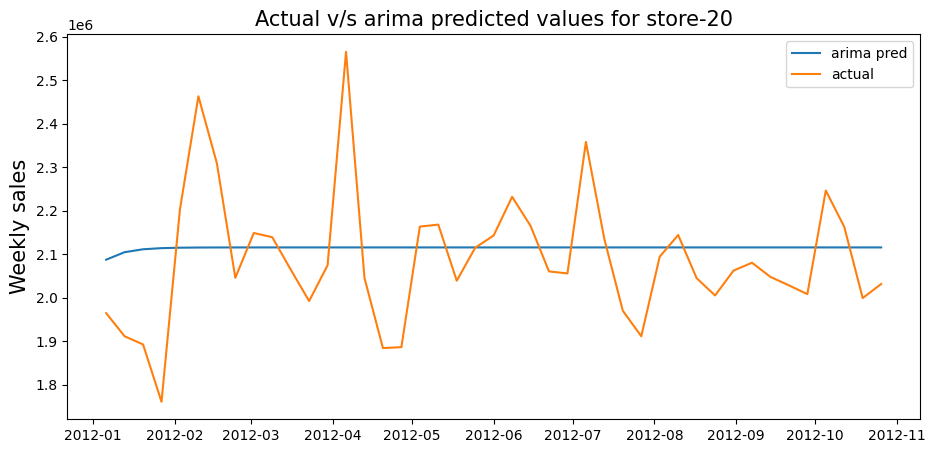

In [325]:
plt.figure(figsize=(11,5))
plt.plot(arimapred20,label="arima pred")
plt.plot(test,label="actual")
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Actual v/s arima predicted values for store-20", fontsize=15)
plt.legend()

Text(0.5, 1.0, 'Arima prediction on test set')

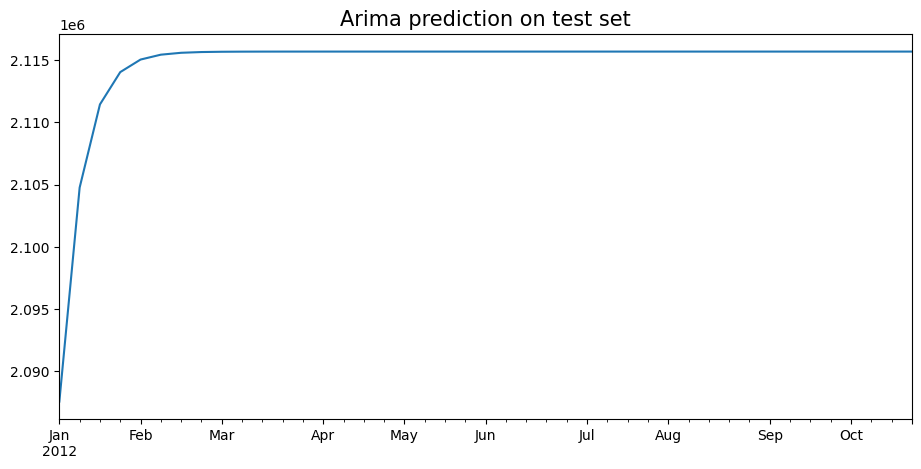

In [326]:
arimapred20.plot(figsize=(11,5))
plt.title("Arima prediction on test set", fontsize=15)

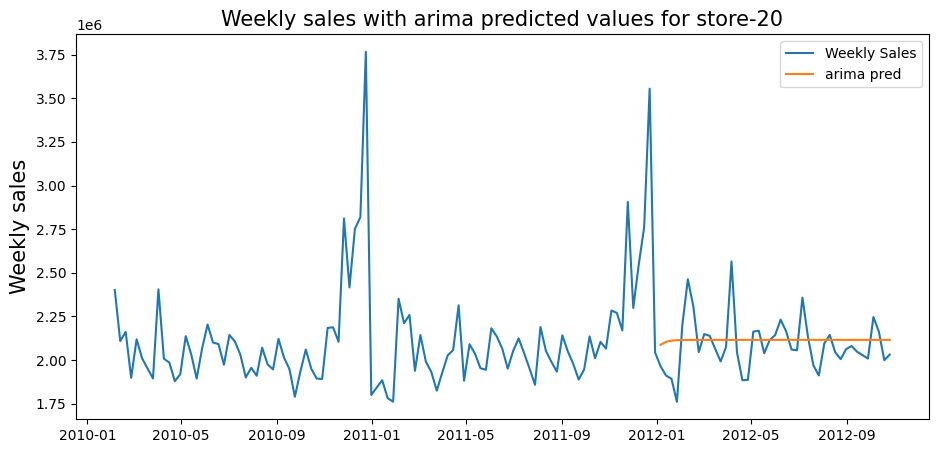

In [327]:
plt.figure(figsize=(11,5))
plt.plot(sales20,label="Weekly Sales")
plt.plot(arimapred20,label="arima pred")
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Weekly sales with arima predicted values for store-20", fontsize=15)
plt.legend()

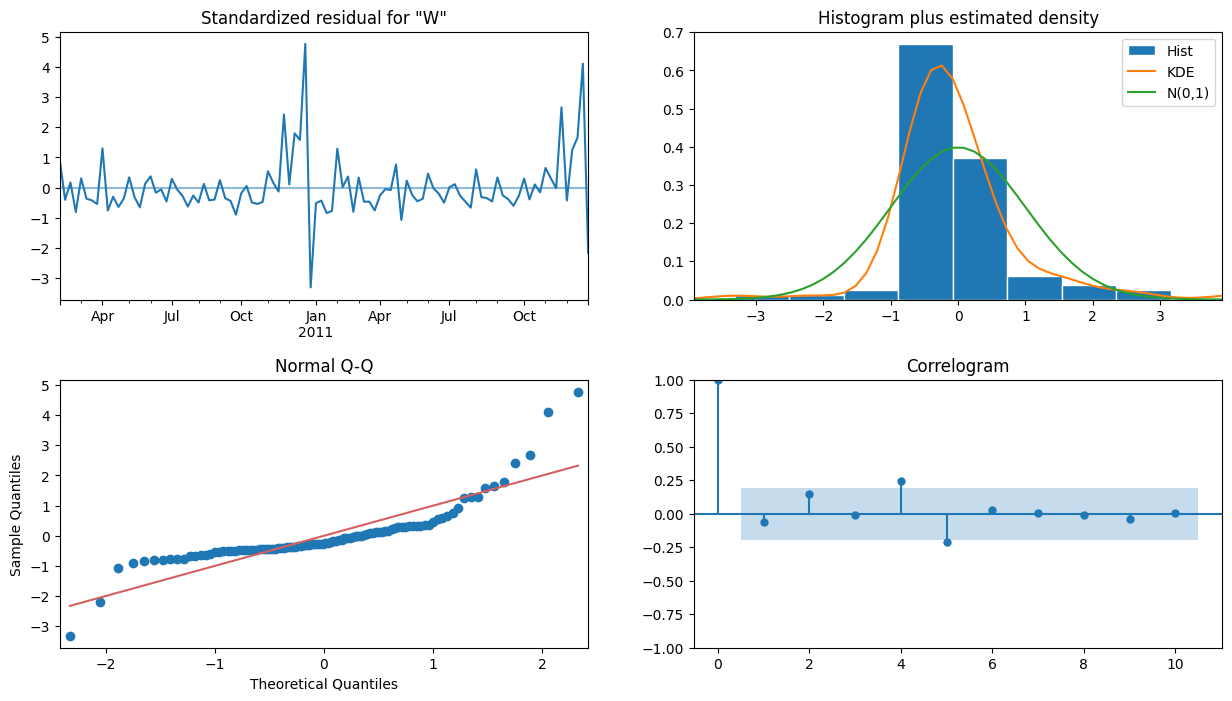

In [328]:
arima20.plot_diagnostics(figsize=(15,8));
plt.subplots_adjust(hspace=0.3)

In [329]:
stepwise_fit20_s = auto_arima(sales20, trace=True, m=52, seasonal=True)
stepwise_fit20_s.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=3926.422, Time=10.81 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=3991.763, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=3948.798, Time=2.85 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=3945.998, Time=0.94 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=4574.703, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=3938.428, Time=5.97 sec
 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=3924.494, Time=8.84 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=3974.854, Time=0.31 sec
 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=3926.469, Time=54.82 sec
 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=3929.233, Time=55.90 sec
 ARIMA(1,0,2)(1,0,0)[52] intercept   : AIC=3928.474, Time=5.35 sec
 ARIMA(2,0,1)(1,0,0)[52] intercept   : AIC=3929.204, Time=5.54 sec
 ARIMA(3,0,2)(1,0,0)[52] intercept   : AIC=3926.154, Time=10.30 sec
 ARIMA(2,0,3)(1,0,0)[52] intercept   : AIC=3931.403, Time=7.42 sec
 ARIMA(1,0,1)(1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  143
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 52)   Log Likelihood               -1955.247
Date:                             Sat, 17 Jun 2023   AIC                           3924.494
Time:                                     09:18:24   BIC                           3945.234
Sample:                                 02-05-2010   HQIC                          3932.922
                                      - 10-26-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.282e+06    2.7e-07   4.74e+12      0.000    1.28e+06    1.28e+06
ar.L1         -0.7231      0.370     -1.952      0.051      -1.449       0.003
ar.L2          0.0185      0.394      0.047      0.962      -0.753       0.790
ma.L1          1.0940      0.411      2.665      0.008       0.289       1.899
ma.L2          0.3932      0.267      1.471      0.141      -0.131       0.917
ar.S.L52       0.6454      0.054     11.874      0.000       0.539       0.752
sigma2      6.148e+10   8.75e-12   7.02e+21      0.000    6.15e+10    6.15e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               531.50
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             1.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.01e+37. Standard errors may be unstable.
"""

In [330]:
sarima20 = SARIMAX(train, order=(2,0,2), seasonal_order=(1,0,0,52)).fit()
sarima20.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        Weekly_Sales   No. Observations:                  100
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 52)   Log Likelihood               -1389.161
Date:                             Sat, 17 Jun 2023   AIC                           2790.322
Time:                                     09:18:27   BIC                           2805.954
Sample:                                 02-05-2010   HQIC                          2796.649
                                      - 12-30-2011                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1029      0.648      0.159      0.874      -1.168       1.374
ar.L2          0.8855      0.648      1.367      0.172      -0.384       2.156
ma.L1          0.2675      0.685      0.390      0.696      -1.075       1.610
ma.L2         -0.4808      0.466     -1.032      0.302      -1.394       0.432
ar.S.L52       0.5911      0.076      7.815      0.000       0.443       0.739
sigma2      8.297e+10   5.41e-12   1.53e+22      0.000     8.3e+10     8.3e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):               227.94
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.37
Prob(H) (two-sided):                  0.89   Kurtosis:                        10.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.8e+38. Standard errors may be unstable.
"""

In [331]:
sarimapred20 = sarima20.predict(start=len(train), end=len(train)+len(test)-1, typ="levels")
sarimapred20

2012-01-06    2.176829e+06
2012-01-13    2.157462e+06
2012-01-20    2.123603e+06
2012-01-27    2.075581e+06
2012-02-03    2.444116e+06
2012-02-10    2.331661e+06
2012-02-17    2.374203e+06
2012-02-24    2.160117e+06
2012-03-02    2.291575e+06
2012-03-09    2.180433e+06
2012-03-16    2.152435e+06
2012-03-23    2.071338e+06
2012-03-30    2.136781e+06
2012-04-06    2.179966e+06
2012-04-13    2.200212e+06
2012-04-20    2.338433e+06
2012-04-27    2.083686e+06
2012-05-04    2.195484e+06
2012-05-11    2.162885e+06
2012-05-18    2.103131e+06
2012-05-25    2.096188e+06
2012-06-01    2.227306e+06
2012-06-08    2.196993e+06
2012-06-15    2.147064e+06
2012-06-22    2.076428e+06
2012-06-29    2.128972e+06
2012-07-06    2.167216e+06
2012-07-13    2.110212e+06
2012-07-20    2.053755e+06
2012-07-27    1.992144e+06
2012-08-03    2.183619e+06
2012-08-10    2.095988e+06
2012-08-17    2.054862e+06
2012-08-24    2.015222e+06
2012-08-31    2.133798e+06
2012-09-07    2.073853e+06
2012-09-14    2.026972e+06
2

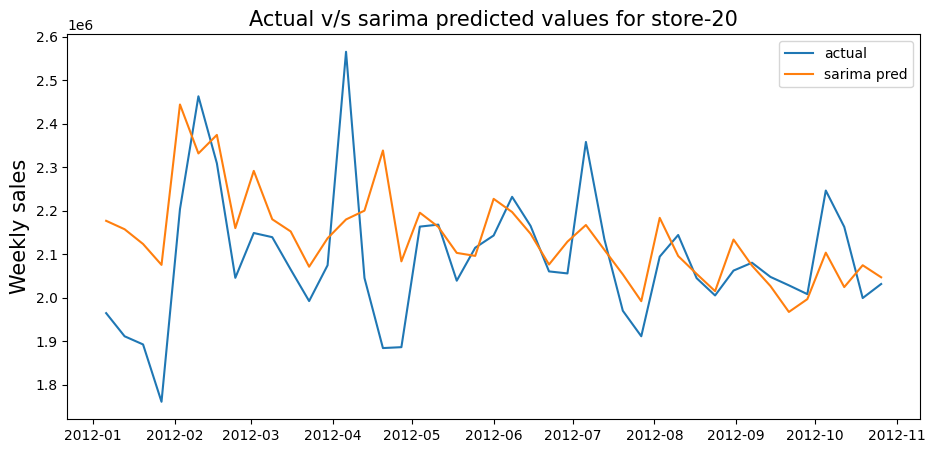

In [332]:
plt.figure(figsize=(11,5))
plt.plot(test,label="actual")
plt.plot(sarimapred20,label="sarima pred")
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Actual v/s sarima predicted values for store-20", fontsize=15)
plt.legend()

Text(0.5, 1.0, 'Sarima prediction on test set')

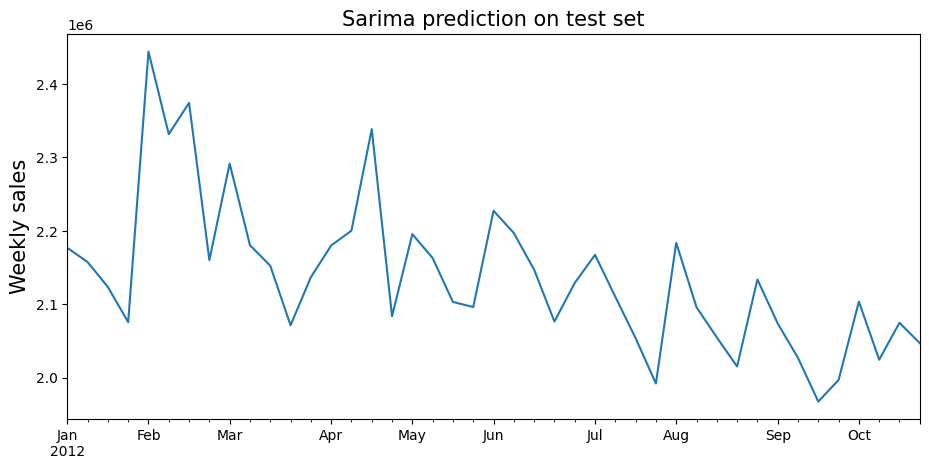

In [333]:
sarimapred20.plot(figsize=(11,5))
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Sarima prediction on test set", fontsize=15)

Text(0.5, 1.0, 'Weekly sales with sarima predicted values for store-20')

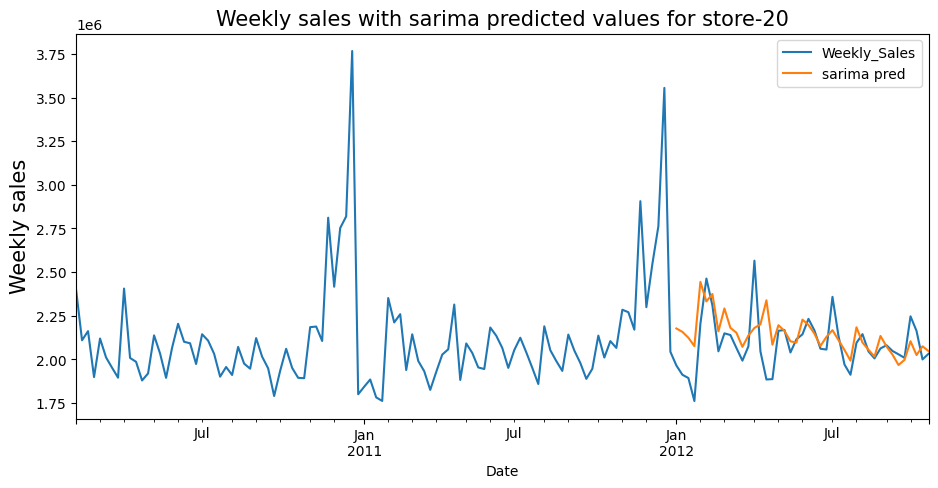

In [334]:
store20["sarima pred"] = sarimapred20
store20[["Weekly_Sales", "sarima pred"]].plot(figsize=(11,5))
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Weekly sales with sarima predicted values for store-20", fontsize=15)

In [335]:
futurepred_sarima20 = sarima20.get_prediction(start="2012-11-02", end="2013-01-25")
futurepred_sarima20

In [336]:
futurepred_sarima20.predicted_mean

2012-11-02    2.170999e+06
2012-11-09    2.157905e+06
2012-11-16    2.093564e+06
2012-11-23    2.524077e+06
2012-11-30    2.159898e+06
2012-12-07    2.301396e+06
2012-12-14    2.424492e+06
2012-12-21    2.888302e+06
2012-12-28    1.989534e+06
2013-01-04    2.063840e+06
2013-01-11    2.047566e+06
2013-01-18    2.022928e+06
2013-01-25    1.989792e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'Future predictions')

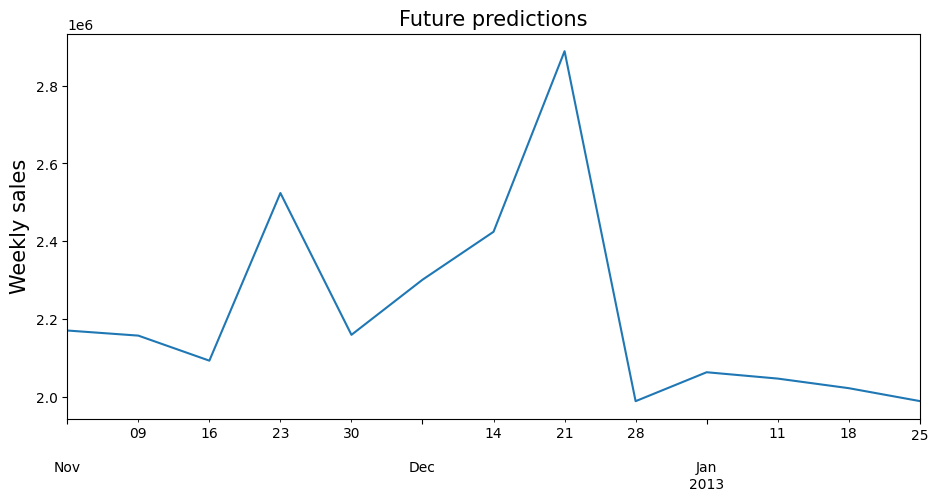

In [337]:
futurepred_sarima20.predicted_mean.plot(figsize=(11,5))
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Future predictions", fontsize=15)

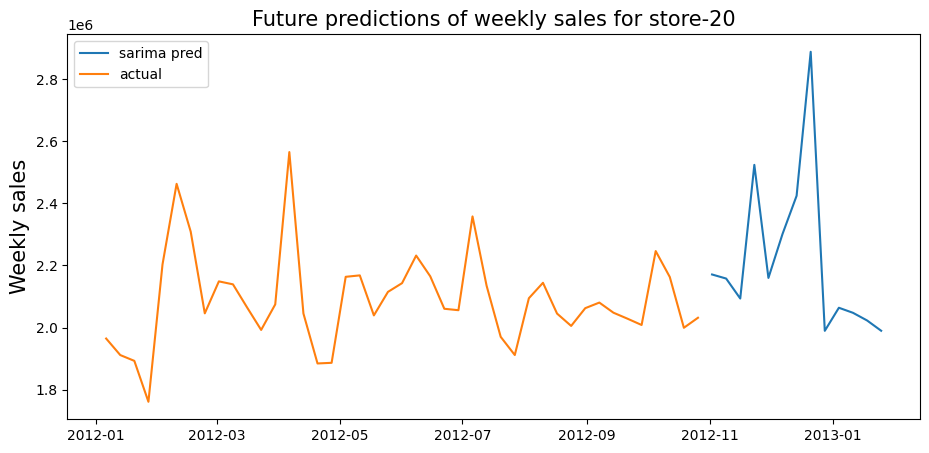

In [338]:
plt.figure(figsize=(11,5))
plt.plot(futurepred_sarima20.predicted_mean,label="sarima pred")
plt.plot(test,label="actual")
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Future predictions of weekly sales for store-20", fontsize=15)
plt.legend()

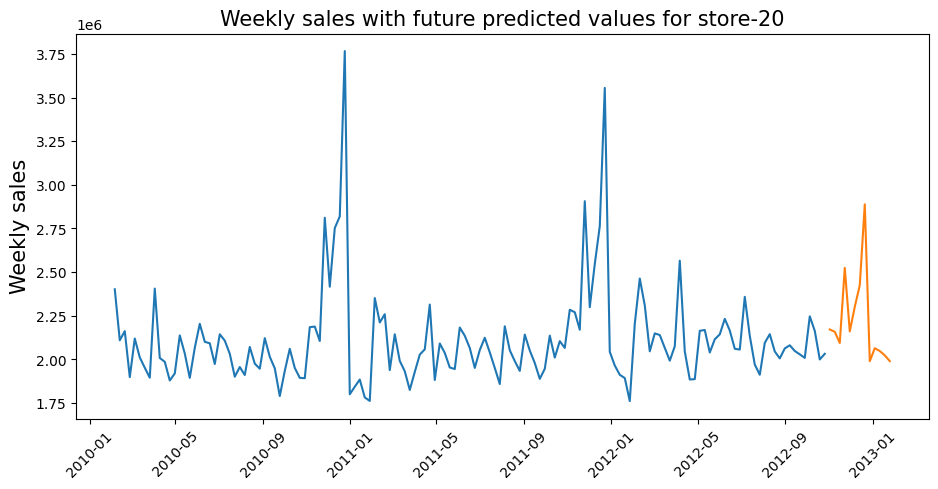

In [339]:
plt.figure(figsize=(11,5))
plt.xticks(rotation=45)
plt.plot(sales20)
plt.plot(futurepred_sarima20.predicted_mean)
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Weekly sales with future predicted values for store-20", fontsize=15)
plt.show()

In [340]:
# choosing store 37
store37 = df_ts.loc[df_ts.Store == 37]
store37

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05     37     536006.73             0        45.97       2.572   
2010-02-12     37     529852.70             1        46.11       2.548   
2010-02-19     37     510382.50             0        45.66       2.514   
2010-02-26     37     513615.82             0        50.87       2.561   
2010-03-05     37     519255.68             0        51.33       2.625   
...           ...           ...           ...          ...         ...   
2012-09-28     37     527953.14             0        79.49       3.666   
2012-10-05     37     546122.37             0        73.57       3.617   
2012-10-12     37     521810.75             0        71.28       3.601   
2012-10-19     37     551969.10             0        74.06       3.594   
2012-10-26     37     534738.43             0        74.39       3.506   

                   CPI  Unemployment  
Date                                  
2010-02-05  209.852966         8.554  
2010-02-12  209.997021         8.554  
2010-02-19  210.045102         8.554  
2010-02-26  210.077189         8.554  
2010-03-05  210.109275         8.554  
...                ...           ...  
2012-09-28  221.655600         6.623  
2012-10-05  221.853340         6.228  
2012-10-12  222.051079         6.228  
2012-10-19  222.095172         6.228  
2012-10-26  222.113657         6.228  

[143 rows x 7 columns]

In [341]:
sales37 = pd.DataFrame(store37.groupby(store37.index)["Weekly_Sales"].sum())
sales37

Weekly_Sales
Date                    
2010-02-05     536006.73
2010-02-12     529852.70
2010-02-19     510382.50
2010-02-26     513615.82
2010-03-05     519255.68
...                  ...
2012-09-28     527953.14
2012-10-05     546122.37
2012-10-12     521810.75
2012-10-19     551969.10
2012-10-26     534738.43

[143 rows x 1 columns]

Text(0.5, 1.0, 'Weekly sales of store-37 v/s store-20')

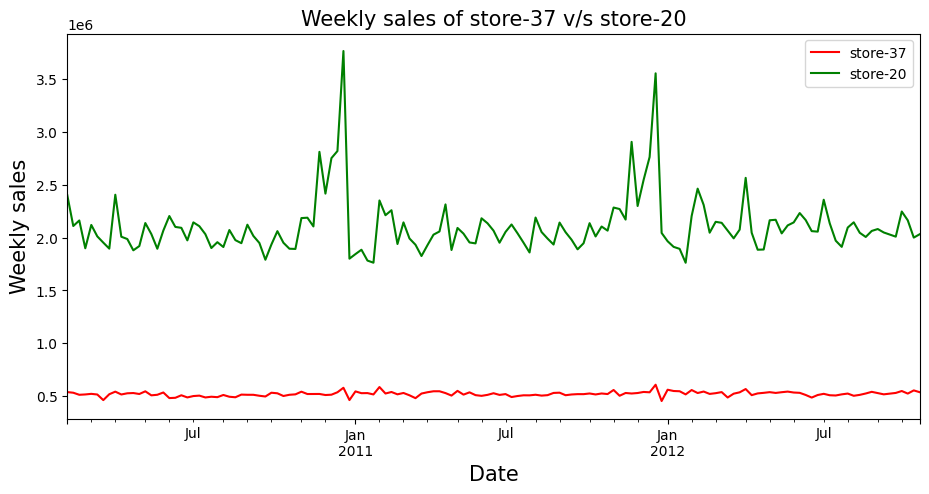

In [342]:
sales37.Weekly_Sales.plot(label="store-37", color="red", legend=True, figsize=(11,5))
sales20.Weekly_Sales.plot(label="store-20", color="green", legend=True, figsize=(11,5))
plt.xlabel("Date", fontsize=15)
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Weekly sales of store-37 v/s store-20", fontsize=15)

# clearly store-37 has very less sales

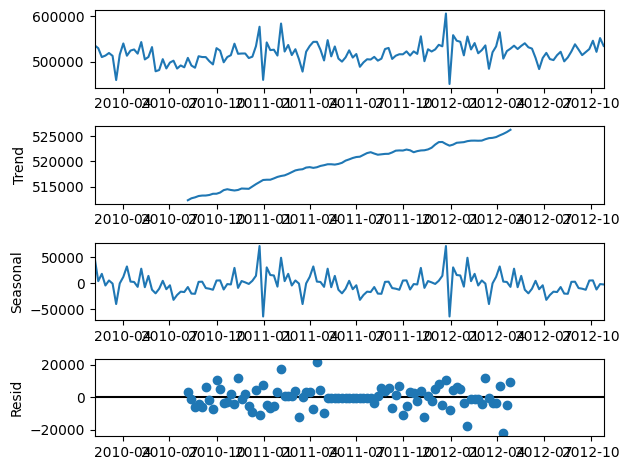

In [343]:
decomp = seasonal_decompose(sales37)
decomp.plot();

In [344]:
adf3 = adfuller(sales37)
adf3

(-3.344321857411632,
 0.0130098552023852,
 3,
 139,
 {'1%': -3.4782936965183815,
  '5%': -2.882567574015525,
  '10%': -2.5779830117488745},
 2914.633278671939)

In [345]:
if(adf3[1] < 0.05):
    print("data is stationary")
else:
    print("data is stationary")

data is stationary


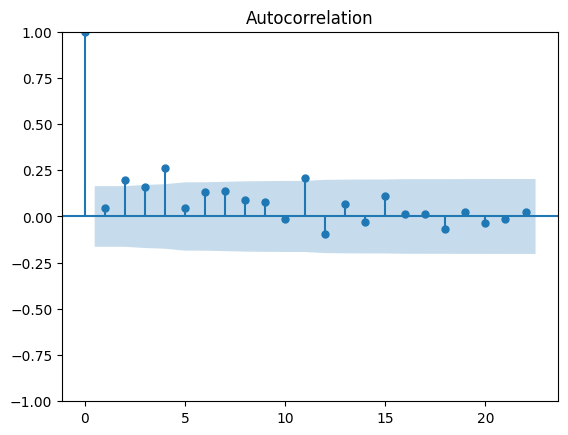

In [346]:
plot_acf(sales37);

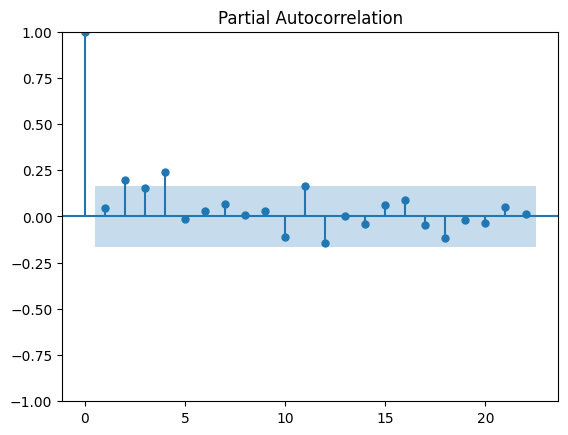

In [347]:
plot_pacf(sales37);

In [348]:
stepwise_fit37 = auto_arima(sales37, trace=True)
stepwise_fit37.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3352.679, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3335.814, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3326.931, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3340.802, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3333.818, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3334.739, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3343.709, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3346.513, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3324.962, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3332.848, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3341.975, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3338.987, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3344.791, Time=0.27 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.480 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1660.481
Date:                Sat, 17 Jun 2023   AIC                           3324.962
Time:                        09:18:34   BIC                           3330.874
Sample:                    02-05-2010   HQIC                          3327.365
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1893      0.011    -17.135      0.000      -0.211      -0.168
sigma2      6.006e+08   2.32e-13   2.59e+21      0.000    6.01e+08    6.01e+08
===================================================================================
Ljung-Box (L1) (Q):                  31.54   Jarque-Bera (JB):               202.45
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                            -0.76
Prob(H) (two-sided):                  0.64   Kurtosis:                         8.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [349]:
train = sales37[:100]
test = sales37[100:]

In [350]:
arima37 = ARIMA(train, order=(1,1,0)).fit()
arima37.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  100
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1164.546
Date:                Sat, 17 Jun 2023   AIC                           2333.091
Time:                        09:18:34   BIC                           2338.281
Sample:                    02-05-2010   HQIC                          2335.191
                         - 12-30-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1436      0.017     -8.592      0.000      -0.176      -0.111
sigma2       6.81e+08   1.08e-12   6.32e+20      0.000    6.81e+08    6.81e+08
===================================================================================
Ljung-Box (L1) (Q):                  19.46   Jarque-Bera (JB):               156.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.70   Skew:                            -1.16
Prob(H) (two-sided):                  0.13   Kurtosis:                         8.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.52e+36. Standard errors may be unstable.
"""

In [351]:
arima37_pred = arima37.predict(start=len(train), end=len(train)+len(test)-1, typ="levels")
arima37_pred

2012-01-06    473513.746163
2012-01-13    470327.080559
2012-01-20    470784.791519
2012-01-27    470719.049032
2012-02-03    470728.491835
2012-02-10    470727.135535
2012-02-17    470727.330345
2012-02-24    470727.302364
2012-03-02    470727.306383
2012-03-09    470727.305806
2012-03-16    470727.305888
2012-03-23    470727.305877
2012-03-30    470727.305878
2012-04-06    470727.305878
2012-04-13    470727.305878
2012-04-20    470727.305878
2012-04-27    470727.305878
2012-05-04    470727.305878
2012-05-11    470727.305878
2012-05-18    470727.305878
2012-05-25    470727.305878
2012-06-01    470727.305878
2012-06-08    470727.305878
2012-06-15    470727.305878
2012-06-22    470727.305878
2012-06-29    470727.305878
2012-07-06    470727.305878
2012-07-13    470727.305878
2012-07-20    470727.305878
2012-07-27    470727.305878
2012-08-03    470727.305878
2012-08-10    470727.305878
2012-08-17    470727.305878
2012-08-24    470727.305878
2012-08-31    470727.305878
2012-09-07    470727

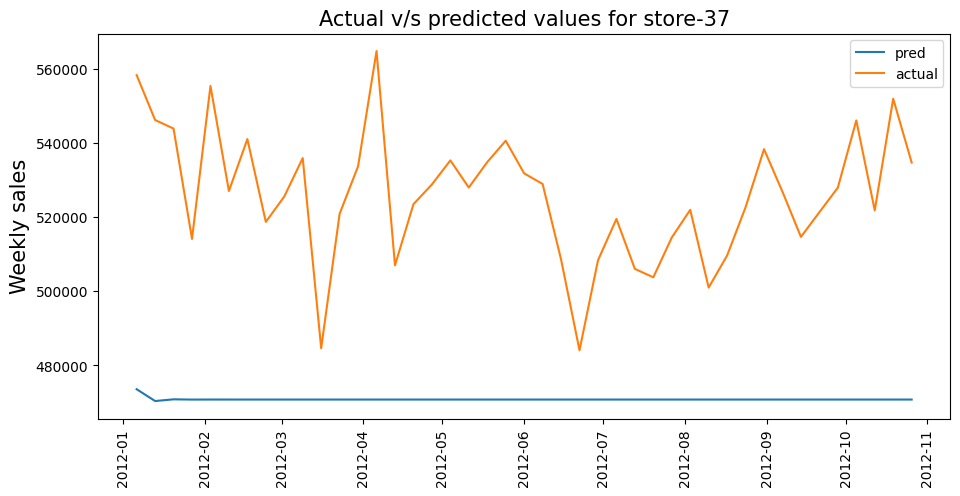

In [352]:
plt.figure(figsize=(11,5))
plt.xticks(rotation=90)
plt.plot(arima37_pred, label="pred")
plt.plot(test, label="actual")
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Actual v/s predicted values for store-37", fontsize=15)
plt.legend()

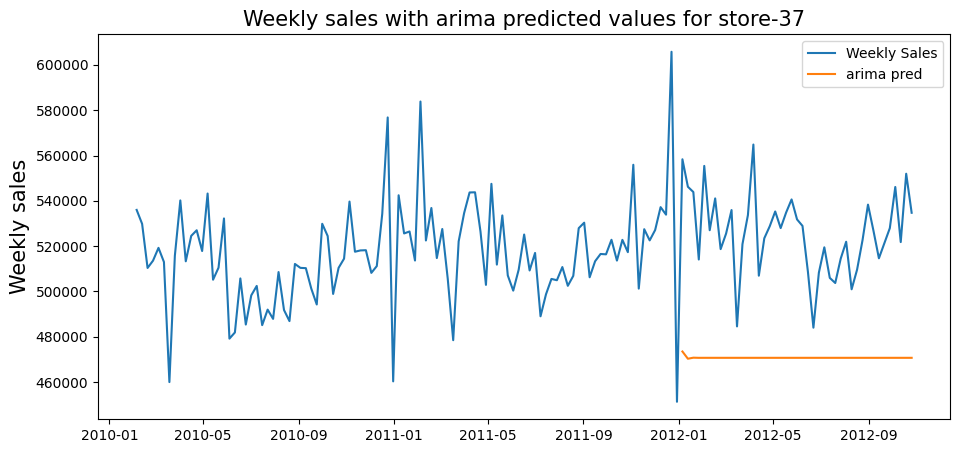

In [353]:
plt.figure(figsize=(11,5))
plt.plot(sales37,label="Weekly Sales")
plt.plot(arima37_pred,label="arima pred")
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Weekly sales with arima predicted values for store-37", fontsize=15)
plt.legend()

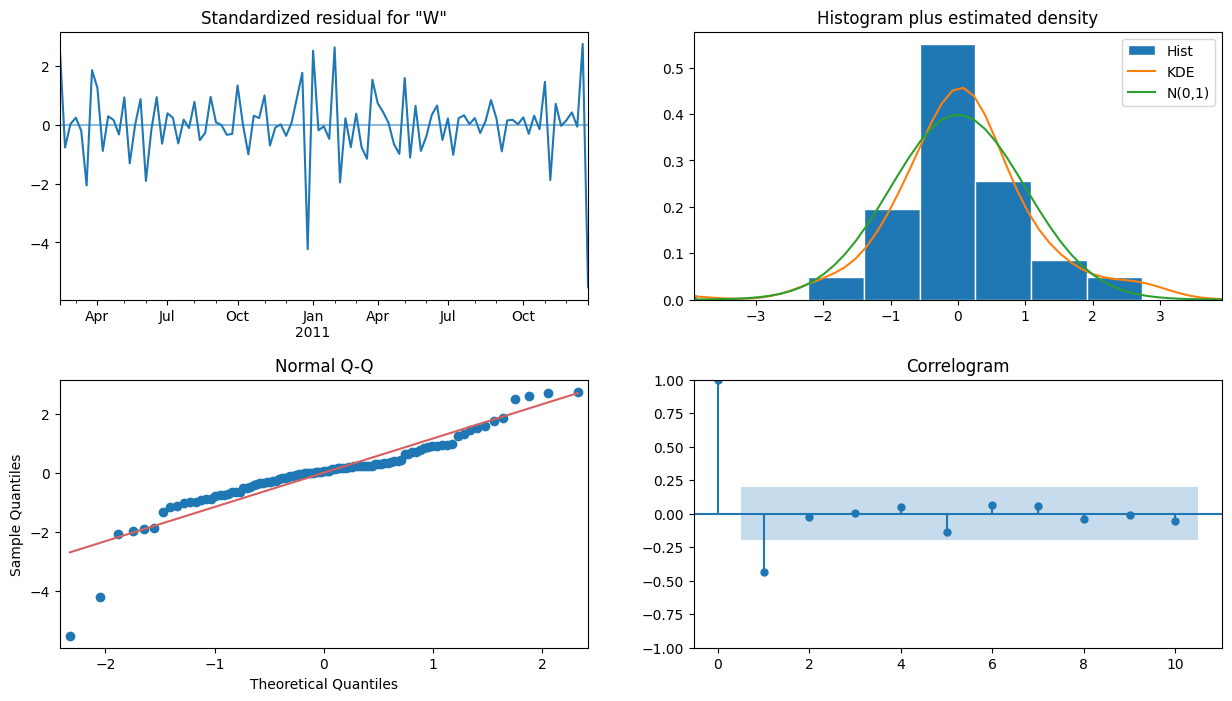

In [354]:
arima37.plot_diagnostics(figsize=(15,8));
plt.subplots_adjust(hspace=0.3)

In [355]:
stepwise_fit37_s = auto_arima(sales37, trace=True, m=52, seasonal=True)
stepwise_fit37_s.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=3317.462, Time=9.13 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=3335.814, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=3301.357, Time=1.25 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=3313.077, Time=2.82 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=3333.818, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=3326.931, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[52] intercept   : AIC=3301.689, Time=7.10 sec
 ARIMA(1,1,0)(1,0,1)[52] intercept   : AIC=3301.695, Time=2.18 sec
 ARIMA(1,1,0)(0,0,1)[52] intercept   : AIC=3304.904, Time=0.95 sec
 ARIMA(1,1,0)(2,0,1)[52] intercept   : AIC=3303.686, Time=6.50 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=3313.578, Time=0.96 sec
 ARIMA(2,1,0)(1,0,0)[52] intercept   : AIC=3305.513, Time=2.85 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=3311.063, Time=2.41 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=3308.681, Time=2.23 sec
 ARIMA(2,1,1)(1,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  143
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 52)   Log Likelihood               -1646.673
Date:                            Sat, 17 Jun 2023   AIC                           3299.347
Time:                                    09:19:48   BIC                           3308.214
Sample:                                02-05-2010   HQIC                          3302.950
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1525      0.015    -10.461      0.000      -0.181      -0.124
ar.S.L52       0.2275      0.020     11.645      0.000       0.189       0.266
sigma2      6.006e+08   2.98e-12   2.01e+20      0.000    6.01e+08    6.01e+08
===================================================================================
Ljung-Box (L1) (Q):                  25.09   Jarque-Bera (JB):               145.32
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.94
Prob(H) (two-sided):                  0.98   Kurtosis:                         7.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.81e+35. Standard errors may be unstable.
"""

In [356]:
sarima37 = SARIMAX(train, order=(1,1,0), seasonal_order=(1,0,0,52)).fit()
sarima37.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 52)   Log Likelihood               -1155.457
Date:                            Sat, 17 Jun 2023   AIC                           2316.914
Time:                                    09:19:51   BIC                           2324.700
Sample:                                02-05-2010   HQIC                          2320.064
                                     - 12-30-2011                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1186      0.021     -5.548      0.000      -0.161      -0.077
ar.S.L52       0.2001      0.028      7.167      0.000       0.145       0.255
sigma2       6.81e+08   7.13e-12   9.56e+19      0.000    6.81e+08    6.81e+08
===================================================================================
Ljung-Box (L1) (Q):                  15.96   Jarque-Bera (JB):               120.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.50   Skew:                            -1.22
Prob(H) (two-sided):                  0.25   Kurtosis:                         7.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.36e+35. Standard errors may be unstable.
"""

In [357]:
sarimapred37 = sarima37.predict(start=len(train), end=len(train)+len(test)-1, typ="levels")
sarimapred37

2012-01-06    483323.319262
2012-01-13    478106.025657
2012-01-20    478499.033821
2012-01-27    475908.264432
2012-02-03    489954.379020
2012-02-10    477680.690556
2012-02-17    480548.145866
2012-02-24    476128.345278
2012-03-02    478693.070174
2012-03-09    474297.422660
2012-03-16    468871.909347
2012-03-23    477598.990352
2012-03-30    480095.421718
2012-04-06    481921.659381
2012-04-13    481936.212232
2012-04-20    478465.324300
2012-04-27    473758.576898
2012-05-04    482684.255981
2012-05-11    475550.603052
2012-05-18    479892.398342
2012-05-25    474592.912988
2012-06-01    473250.808300
2012-06-08    475105.395100
2012-06-15    478204.727997
2012-06-22    475031.133730
2012-06-29    476581.305555
2012-07-06    470984.858784
2012-07-13    472924.242810
2012-07-20    474284.038688
2012-07-27    474170.237837
2012-08-03    475333.607258
2012-08-10    473675.757147
2012-08-17    474555.130817
2012-08-24    478768.118066
2012-08-31    479252.603304
2012-09-07    474430

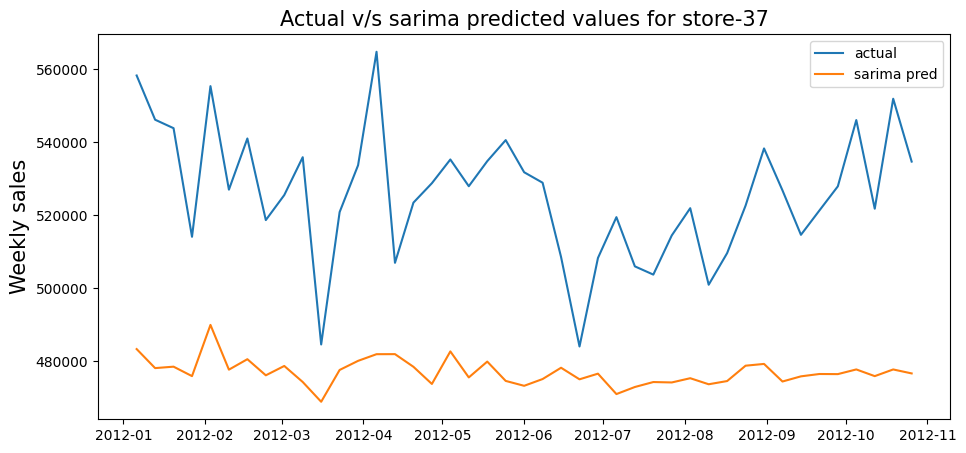

In [358]:
plt.figure(figsize=(11,5))
plt.plot(test,label="actual")
plt.plot(sarimapred37,label="sarima pred")
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Actual v/s sarima predicted values for store-37", fontsize=15)
plt.legend()

Text(0.5, 1.0, 'Sarima prediction on test set')

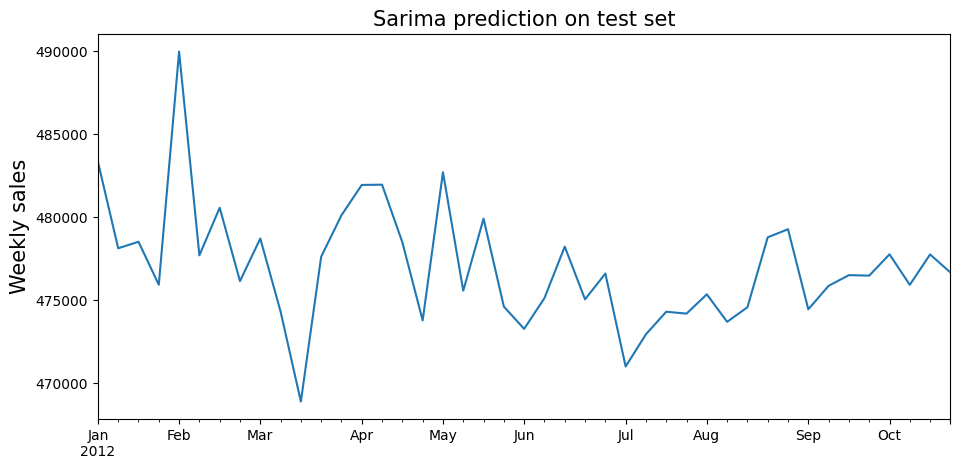

In [359]:
sarimapred37.plot(figsize=(11,5))
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Sarima prediction on test set", fontsize=15)

Text(0.5, 1.0, 'Weekly sales with sarima predicted values for store-37')

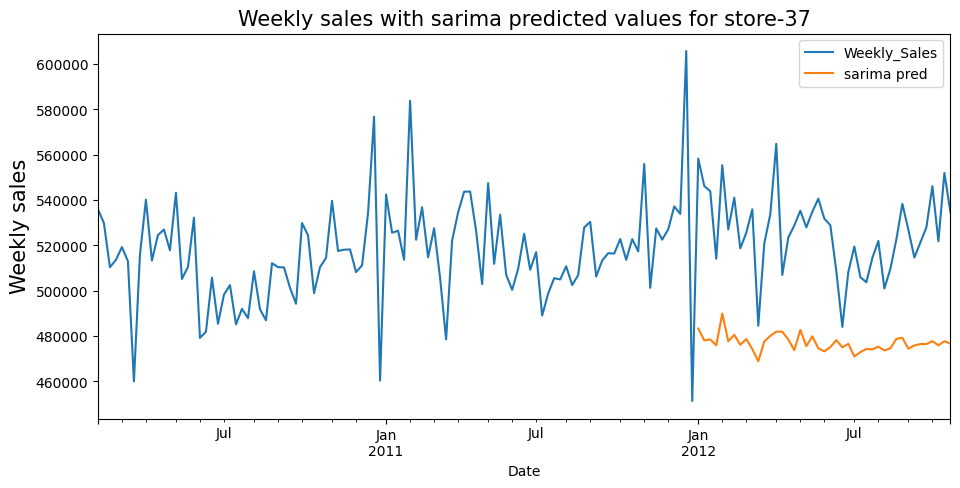

In [360]:
store37["sarima pred"] = sarimapred37
store37[["Weekly_Sales", "sarima pred"]].plot(figsize=(11,5))
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Weekly sales with sarima predicted values for store-37", fontsize=15)

In [361]:
futurepred_sarima37 = sarima37.get_prediction(start="2012-11-02", end="2013-01-25")
futurepred_sarima37

In [362]:
futurepred_sarima37.predicted_mean

2012-11-02    484367.971378
2012-11-09    473428.450752
2012-11-16    478677.626595
2012-11-23    477688.679225
2012-11-30    478602.114292
2012-12-07    480624.964551
2012-12-14    479960.699268
2012-12-21    494348.585032
2012-12-28    463432.763860
2013-01-04    469836.680542
2013-01-11    468792.443226
2013-01-18    468871.103509
2013-01-25    468352.563002
Freq: W-FRI, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'Future predictions')

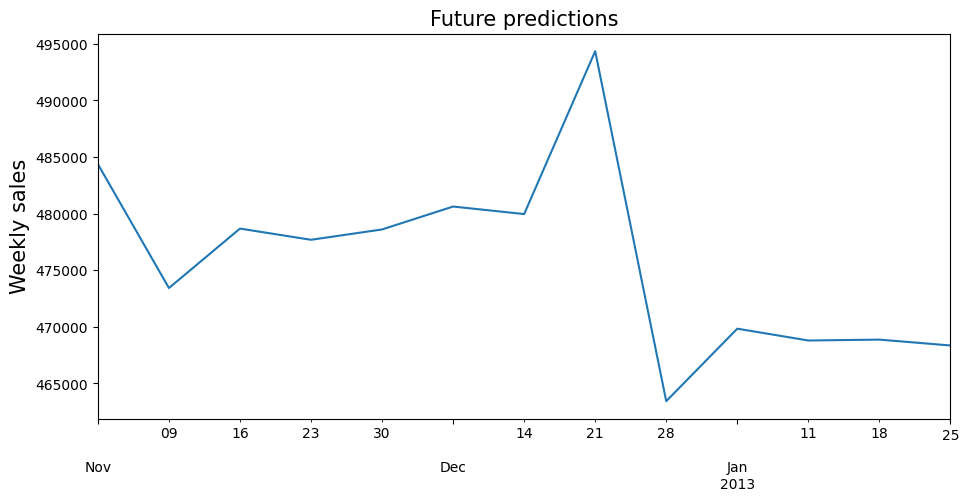

In [363]:
futurepred_sarima37.predicted_mean.plot(figsize=(11,5))
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Future predictions", fontsize=15)

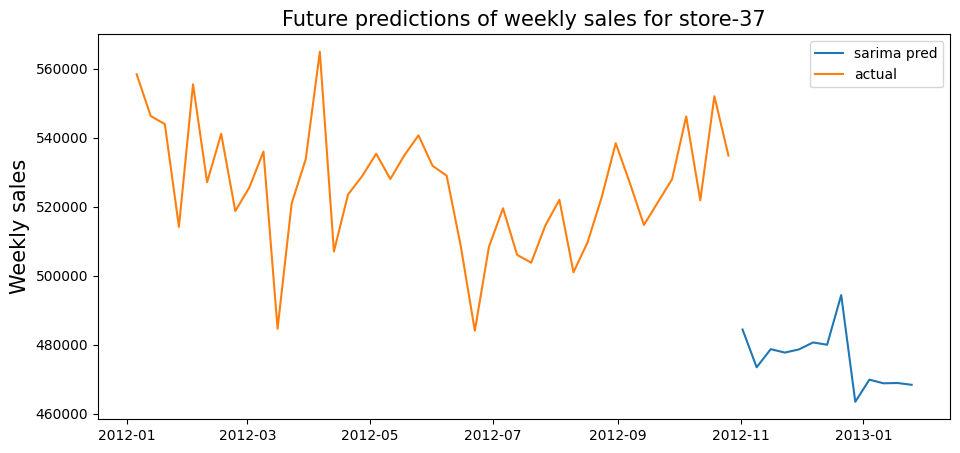

In [364]:
plt.figure(figsize=(11,5))
plt.plot(futurepred_sarima37.predicted_mean,label="sarima pred")
plt.plot(test,label="actual")
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Future predictions of weekly sales for store-37", fontsize=15)
plt.legend()

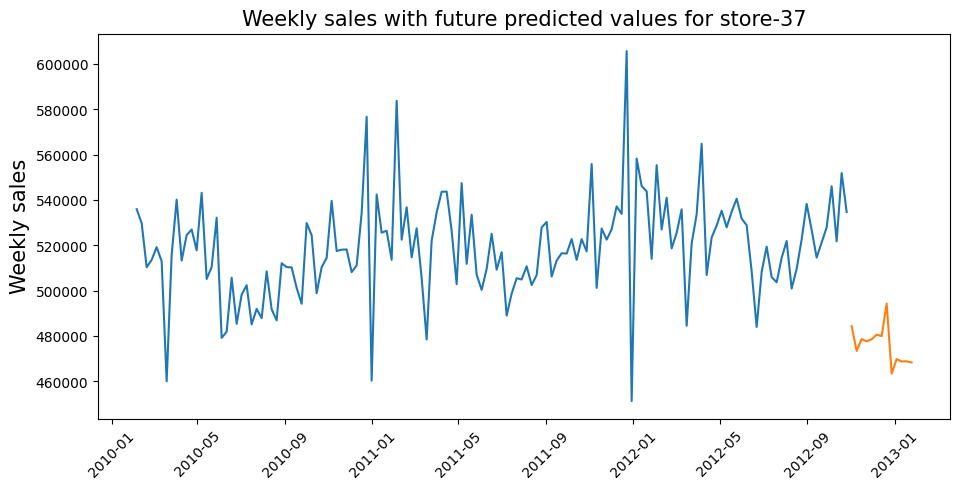

In [365]:
plt.figure(figsize=(11,5))
plt.xticks(rotation=45)
plt.plot(sales37)
plt.plot(futurepred_sarima37.predicted_mean)
plt.ylabel("Weekly sales", fontsize=15)
plt.title("Weekly sales with future predicted values for store-37", fontsize=15)
plt.show()